<h1>Import the necessary libraries</h1>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
# %matplotlib inline
import os
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import torch

In [52]:
alpha_dict = {
    1: 'A_LEFT', 2: 'A_RIGHT',
    3: 'B_LEFT', 4: 'B_RIGHT',
    5: 'C_LEFT', 6: 'C_RIGHT',
    7: 'D_LEFT', 8: 'D_RIGHT',
    9: 'E_LEFT', 10: 'E_RIGHT',
    11: 'F_LEFT', 12: 'F_RIGHT',
    13: 'G_LEFT', 14: 'G_RIGHT',
    15: 'H_LEFT', 16: 'H_RIGHT',
    17: 'I_LEFT', 18: 'I_RIGHT',
    19: 'K_LEFT', 20: 'K_RIGHT',
    21: 'L_LEFT', 22: 'L_RIGHT',
    23: 'M_LEFT', 24: 'M_RIGHT',
    25: 'N_LEFT', 26: 'N_RIGHT',
    27: 'O_LEFT', 28: 'O_RIGHT',
    29: 'P_LEFT', 30: 'P_RIGHT',
    31: 'Q_LEFT', 32: 'Q_RIGHT',
    33: 'R_LEFT', 34: 'R_RIGHT',
    35: 'S_LEFT', 36: 'S_RIGHT',
    37: 'T_LEFT', 38: 'T_RIGHT',
    39: 'U_LEFT', 40: 'U_RIGHT',
    41: 'V_LEFT', 42: 'V_RIGHT',
    43: 'W_LEFT', 44: 'W_RIGHT',
    45: 'X_LEFT', 46: 'X_RIGHT',
    47: 'Y_LEFT', 48: 'Y_RIGHT'
}


In [55]:
alpha_dict_asl = {
    1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H',
    9: 'I', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q',
    17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'
}

In [4]:
root_dir = '/HDD-1T/KNN'

In [5]:
root_dir_asl = '/HDD-1T/KNN_asl_alphabet_train' 

In [6]:
def get_key(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None

<h1>Create suitable data frames</h1>

<h2>Compute Euclid. Distances with Z for both datasets and save them in a data frame</h2>

In [56]:
df_euclid = pd.DataFrame()

euclidean_dist_final = []
euclidean_dist_npy_s = []

for root, subdirs, files in os.walk(root_dir):
    for subdir in subdirs:
        if subdir in alpha_dict.values():
            subdir_path = os.path.join(root, subdir)
            label = get_key(alpha_dict, subdir)
            print(f"Processing files in subdirectory: {subdir}")
            
            for filename in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, filename) 
            
                if 'euclidean_distances' in filename and 'without'not in filename:
                    print(file_path)
                    contents_npy = np.load(file_path, allow_pickle=True) # load the contents of the euclidean distances npy's 
                    contents_with_label = np.insert(contents_npy, 0, label)
                    euclidean_dist_final = np.append(euclidean_dist_final, contents_with_label)
                    euclidean_dist_npy_s = np.append(euclidean_dist_npy_s, contents_npy)
                    row_df_euclid = pd.DataFrame([contents_with_label])
                    df_euclid = pd.concat([df_euclid, row_df_euclid], ignore_index=True)
        else: 
            continue

Processing files in subdirectory: F_LEFT
/HDD-1T/KNN/F_LEFT/euclidean_distances_74.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_78.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_160.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_69.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_146.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_204.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_100.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_30.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_248.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_73.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_156.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_121.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_171.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_241.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_226.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_45.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_139.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_157.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_255.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_34.npy
/HDD-1T/KNN/F_LEFT/euclide

In [57]:
df_euclid_asl = pd.DataFrame()

euclidean_dist_final_asl = []
euclidean_dist_npy_s_asl = []

for root, subdirs, files in os.walk(root_dir_asl):
    for subdir in subdirs:
        if subdir in alpha_dict_asl.values():
            subdir_path = os.path.join(root, subdir)
            label = get_key(alpha_dict_asl, subdir)
            print(f"Processing files in subdirectory: {subdir}")
            
            for filename in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, filename) 
            
                if 'euclidean_distances' in filename and 'without'not in filename:
                    print(file_path)
                    contents_npy = np.load(file_path, allow_pickle=True) # load the contents of the euclidean distances npy's 
                    contents_with_label = np.insert(contents_npy, 0, label)
                    euclidean_dist_final_asl = np.append(euclidean_dist_final_asl, contents_with_label)
                    euclidean_dist_npy_s_asl = np.append(euclidean_dist_npy_s_asl, contents_npy)
                    row_df_euclid_asl = pd.DataFrame([contents_with_label])
                    df_euclid_asl = pd.concat([df_euclid_asl, row_df_euclid_asl], ignore_index=True)
        else: 
            continue

Processing files in subdirectory: K
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_K1764.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_K2327.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_K1141.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_K1319.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_K1419.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_K923.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_K1512.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_K2306.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_K1793.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_K346.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_K371.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_K687.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_K2776.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_K1045.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_K1943.npy
/HDD-1T/KNN_asl_alphabe

In [58]:
df_euclid_asl.head()

0         1         2         3         4         5         6         7    \
0  10.0  0.107950  0.203843  0.270192  0.322981  0.280089  0.394483  0.466870   
1  10.0  0.092322  0.173566  0.225164  0.257551  0.208282  0.301944  0.359846   
2  10.0  0.095732  0.181383  0.242728  0.293142  0.237405  0.339178  0.404419   
3  10.0  0.138442  0.260083  0.345569  0.414528  0.329907  0.476544  0.567070   
4  10.0  0.129749  0.243836  0.325489  0.391909  0.315723  0.452588  0.536031   

        8         9    ...       201       202       203       204       205  \
0  0.527463  0.254155  ...  0.079087  0.092689  0.054189  0.054294  0.076280   
1  0.408929  0.193720  ...  0.083541  0.086469  0.048102  0.052425  0.067542   
2  0.460798  0.219209  ...  0.077416  0.086280  0.048228  0.051156  0.074620   
3  0.646834  0.306927  ...  0.114662  0.120066  0.071451  0.072048  0.103641   
4  0.607261  0.287878  ...  0.111701  0.119834  0.065263  0.064947  0.102646   

        206       207       208       209       210  
0  0.053765  0.056001  0.055322  0.097866  0.044458  
1  0.048280  0.051874  0.048322  0.089489  0.042913  
2  0.059200  0.063820  0.054124  0.095234  0.042924  
3  0.090625  0.099696  0.072995  0.127944  0.057034  
4  0.088209  0.100308  0.076226  0.133657  0.059490  

[5 rows x 211 columns]

In [59]:
print(euclidean_dist_final.shape)

(2512588,)


In [60]:
df_euclid.head()

0         1         2         3         4         5         6         7    \
0  11.0  0.078186  0.156734  0.209405  0.237922  0.223260  0.310344  0.294451   
1  11.0  0.071038  0.135689  0.179481  0.211314  0.174289  0.257440  0.254032   
2  11.0  0.060105  0.120701  0.169371  0.205262  0.178105  0.249398  0.244143   
3  11.0  0.074935  0.141860  0.188026  0.220388  0.175995  0.261918  0.260656   
4  11.0  0.064073  0.126842  0.174161  0.208909  0.197546  0.270866  0.256880   

        8         9    ...       201       202       203       204       205  \
0  0.264745  0.232604  ...  0.245459  0.171683  0.128026  0.093421  0.079873   
1  0.241403  0.180689  ...  0.254096  0.180079  0.132797  0.097363  0.080374   
2  0.225072  0.190356  ...  0.207872  0.146004  0.106810  0.077318  0.069548   
3  0.246962  0.187625  ...  0.242714  0.169661  0.125415  0.093862  0.081567   
4  0.234637  0.207501  ...  0.224639  0.157661  0.117880  0.087991  0.073710   

        206       207       208       209       210  
0  0.128244  0.170347  0.048939  0.091458  0.042549  
1  0.132814  0.175787  0.052870  0.096342  0.043574  
2  0.113914  0.151408  0.044876  0.082820  0.037994  
3  0.132525  0.172740  0.051430  0.092282  0.041017  
4  0.119533  0.158517  0.046212  0.085539  0.039367  

[5 rows x 211 columns]

In [61]:
df_euclid.to_csv('/HDD-1T/KNN/df_euclid.csv', index=False)

In [62]:
df_euclid_asl.to_csv('/HDD-1T/KNN_asl_alphabet_train/df_euclid_asl.csv', index=False)

<h2>Compute Euclid. Distances without Z for both datasets and save them in a data frame</h2>

In [63]:
df_euclid_without_z = pd.DataFrame()

euclidean_dist_without_z_final = []
euclidean_dist_without_z_npy_s = []

for root, subdirs, files in os.walk(root_dir):
    for subdir in subdirs:
        if subdir in alpha_dict.values():
            subdir_path = os.path.join(root, subdir)
            label = get_key(alpha_dict, subdir)
            print(f"Processing files in subdirectory: {subdir}")
            
            for filename in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, filename) 
             
                if 'euclidean_distances' in filename and 'without' in filename:
                    print(file_path)
                    contents_npy = np.load(file_path, allow_pickle=True) # load the contents of the euclidean distances npy's 
                    contents_with_label = np.insert(contents_npy, 0, label)
                    euclidean_dist_without_z_final = np.append(euclidean_dist_without_z_final, contents_with_label)
                    euclidean_dist_without_z_npy_s = np.append(euclidean_dist_without_z_npy_s, contents_npy)
                    row_df_euclid_without_z = pd.DataFrame([contents_with_label])
                    df_euclid_without_z = pd.concat([df_euclid_without_z, row_df_euclid_without_z], ignore_index=True)

        else: 
            continue

Processing files in subdirectory: F_LEFT
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z78.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z115.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z25.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z29.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z274.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z299.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z68.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z12.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z199.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z118.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z250.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z143.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z75.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z280.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z175.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z35.npy
/HDD-1T/KNN/F_LEFT/euclidean_distances_without_z210.npy
/HDD-1T/KNN/F_

In [64]:
df_euclid_without_z_asl = pd.DataFrame()

euclidean_dist_without_z_final_asl = []
euclidean_dist_without_z_npy_s_asl = []

for root, subdirs, files in os.walk(root_dir_asl):
    for subdir in subdirs:
        if subdir in alpha_dict_asl.values():
            subdir_path = os.path.join(root, subdir)
            label = get_key(alpha_dict_asl, subdir)
            print(f"Processing files in subdirectory: {subdir}")
            
            for filename in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, filename) 
             
                if 'euclidean_distances' in filename and 'without' in filename:
                    print(file_path)
                    contents_npy = np.load(file_path, allow_pickle=True) # load the contents of the euclidean distances npy's 
                    contents_with_label = np.insert(contents_npy, 0, label)
                    euclidean_dist_without_z_final_asl = np.append(euclidean_dist_without_z_final_asl, contents_with_label)
                    euclidean_dist_without_z_npy_s_asl = np.append(euclidean_dist_without_z_npy_s_asl, contents_npy)
                    row_df_euclid_without_z_asl = pd.DataFrame([contents_with_label])
                    df_euclid_without_z_asl = pd.concat([df_euclid_without_z_asl, row_df_euclid_without_z_asl], ignore_index=True)

        else: 
            continue

Processing files in subdirectory: K
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_without_zK1319.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_without_zK2414.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_without_zK1734.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_without_zK1771.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_without_zK804.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_without_zK770.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_without_zK724.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_without_zK946.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_without_zK796.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_without_zK1204.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_without_zK909.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_without_zK1000.npy
/HDD-1T/KNN_asl_alphabet_train/K/euclidean_distances_without_zK1958.npy
/HDD-1T/KNN_asl_alphabet_train/K/e

In [65]:
print(euclidean_dist_without_z_final.shape)

(2512588,)


In [66]:
df_euclid_without_z.head()

0         1         2         3         4         5         6         7    \
0  11.0  0.062569  0.119224  0.151987  0.171023  0.166752  0.237668  0.216723   
1  11.0  0.064175  0.128800  0.178456  0.213729  0.194279  0.268996  0.256834   
2  11.0  0.070757  0.136509  0.175181  0.195145  0.191910  0.258653  0.237728   
3  11.0  0.074950  0.151705  0.199692  0.225621  0.217883  0.294709  0.272905   
4  11.0  0.067447  0.131499  0.174571  0.201378  0.168004  0.238776  0.232979   

        8         9    ...       201       202       203       204       205  \
0  0.190002  0.171578  ...  0.248835  0.177323  0.130312  0.094309  0.077872   
1  0.230071  0.206725  ...  0.221006  0.155152  0.113134  0.081289  0.074253   
2  0.206543  0.198556  ...  0.203879  0.144800  0.108431  0.078946  0.064209   
3  0.238516  0.226131  ...  0.227908  0.158904  0.117940  0.086479  0.074572   
4  0.214670  0.172978  ...  0.225279  0.160170  0.118262  0.084202  0.071219   

        206       207       208       209       210  
0  0.130294  0.173695  0.052562  0.096119  0.043587  
1  0.122172  0.162921  0.048248  0.089279  0.041061  
2  0.104553  0.138781  0.040455  0.074858  0.034454  
3  0.120202  0.158337  0.045717  0.083940  0.038235  
4  0.118393  0.159962  0.047293  0.089029  0.041778  

[5 rows x 211 columns]

In [67]:
df_euclid_without_z_asl.head()

0         1         2         3         4         5         6         7    \
0  10.0  0.122858  0.248055  0.334147  0.403749  0.328392  0.471678  0.559800   
1  10.0  0.076146  0.143938  0.188111  0.207346  0.170555  0.232060  0.278350   
2  10.0  0.097304  0.199629  0.272311  0.333634  0.293787  0.419650  0.495771   
3  10.0  0.096270  0.189341  0.252954  0.305176  0.261315  0.371722  0.439587   
4  10.0  0.133393  0.251111  0.323770  0.387515  0.324151  0.463229  0.549012   

        8         9    ...       201       202       203       204       205  \
0  0.638196  0.305591  ...  0.088823  0.119801  0.069741  0.072128  0.062830   
1  0.316247  0.157337  ...  0.052694  0.065068  0.036780  0.020509  0.038375   
2  0.561960  0.271357  ...  0.075767  0.108831  0.062102  0.061772  0.052336   
3  0.497892  0.243501  ...  0.058351  0.087530  0.049639  0.051239  0.045991   
4  0.624451  0.299404  ...  0.107212  0.138497  0.072034  0.065742  0.070497   

        206       207       208       209       210  
0  0.019498  0.067821  0.072837  0.127755  0.054987  
1  0.027591  0.032456  0.028823  0.052120  0.023831  
2  0.016527  0.063069  0.066635  0.114665  0.048051  
3  0.009587  0.046346  0.053319  0.092036  0.038839  
4  0.036490  0.079928  0.078127  0.140499  0.063169  

[5 rows x 211 columns]

In [68]:
df_euclid_without_z.to_csv('/HDD-1T/KNN/df_euclid_without_z.csv', index=False)

In [69]:
df_euclid_without_z_asl.to_csv('/HDD-1T/KNN_asl_alphabet_train/df_euclid_without_z_asl.csv', index=False)

<h2>Compute the Relative Vectors for both datasets and save them in a data frame</h2>

In [70]:
df_relative_vectors = pd.DataFrame()

relative_vector_final = []
relative_vector_npy_s = []

for root, subdirs, files in os.walk(root_dir):
    for subdir in subdirs:
        if subdir in alpha_dict.values():
            subdir_path = os.path.join(root, subdir)
            label = get_key(alpha_dict, subdir)
            print(f"Processing files in subdirectory: {subdir}")
            
            for filename in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, filename) 
                
                if 'relative' in file_path:
                    print(file_path)
                    contents_npy = np.load(file_path, allow_pickle=True) # load the contents of the euclidean distances npy's 
                    contents_with_label = np.insert(contents_npy, 0, label)
                    relative_vector_final = np.append(relative_vector_final, contents_with_label)
                    relative_vector_npy_s = np.append(relative_vector_npy_s, contents_npy)
                    row_df_relative = pd.DataFrame([contents_with_label])
                    df_relative_vectors = pd.concat([df_relative_vectors, row_df_relative], ignore_index=True)
        else: 
            continue

Processing files in subdirectory: F_LEFT
/HDD-1T/KNN/F_LEFT/relative_vectors_221.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_68.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_117.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_244.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_287.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_265.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_67.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_142.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_116.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_87.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_274.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_35.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_62.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_227.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_31.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_289.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_222.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_181.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_F.24.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_124.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_103.npy
/HDD-1T/KNN/F_LEFT/relative_vectors_262.

In [71]:
df_relative_vectors_asl = pd.DataFrame()

relative_vector_final_asl = []
relative_vector_npy_s_asl = []

for root, subdirs, files in os.walk(root_dir_asl):
    for subdir in subdirs:
        if subdir in alpha_dict_asl.values():
            subdir_path = os.path.join(root, subdir)
            label = get_key(alpha_dict_asl, subdir)
            print(f"Processing files in subdirectory: {subdir}")
            
            for filename in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, filename) 
                
                if 'relative' in file_path:
                    print(file_path)
                    contents_npy = np.load(file_path, allow_pickle=True) # load the contents of the euclidean distances npy's 
                    contents_with_label = np.insert(contents_npy, 0, label)
                    relative_vector_final_asl = np.append(relative_vector_final_asl, contents_with_label)
                    relative_vector_npy_s_asl = np.append(relative_vector_npy_s_asl, contents_npy)
                    row_df_relative_asl = pd.DataFrame([contents_with_label])
                    df_relative_vectors_asl = pd.concat([df_relative_vectors_asl, row_df_relative_asl], ignore_index=True)
        else: 
            continue

Processing files in subdirectory: K
/HDD-1T/KNN_asl_alphabet_train/K/relative_vectors_K2996.npy
/HDD-1T/KNN_asl_alphabet_train/K/relative_vectors_K441.npy
/HDD-1T/KNN_asl_alphabet_train/K/relative_vectors_K1319.npy
/HDD-1T/KNN_asl_alphabet_train/K/relative_vectors_K2121.npy
/HDD-1T/KNN_asl_alphabet_train/K/relative_vectors_K755.npy
/HDD-1T/KNN_asl_alphabet_train/K/relative_vectors_K2943.npy
/HDD-1T/KNN_asl_alphabet_train/K/relative_vectors_K323.npy
/HDD-1T/KNN_asl_alphabet_train/K/relative_vectors_K2197.npy
/HDD-1T/KNN_asl_alphabet_train/K/relative_vectors_K45.npy
/HDD-1T/KNN_asl_alphabet_train/K/relative_vectors_K1660.npy
/HDD-1T/KNN_asl_alphabet_train/K/relative_vectors_K42.npy
/HDD-1T/KNN_asl_alphabet_train/K/relative_vectors_K2168.npy
/HDD-1T/KNN_asl_alphabet_train/K/relative_vectors_K1045.npy
/HDD-1T/KNN_asl_alphabet_train/K/relative_vectors_K2309.npy
/HDD-1T/KNN_asl_alphabet_train/K/relative_vectors_K2954.npy
/HDD-1T/KNN_asl_alphabet_train/K/relative_vectors_K2949.npy
/HDD-1T/KNN

In [72]:
print(relative_vector_final.shape)

(726388,)


In [73]:
df_relative_vectors.head()

0         1         2         3         4         5         6         7   \
0  11.0 -0.056369 -0.012312 -0.018270 -0.105397 -0.048555 -0.035591 -0.141745   
1  11.0 -0.039685 -0.017057 -0.007407 -0.071559 -0.051649 -0.015041 -0.095951   
2  11.0 -0.060620 -0.015061 -0.030594 -0.117240 -0.052926 -0.056245 -0.155758   
3  11.0 -0.045135 -0.012470 -0.017375 -0.083900 -0.049457 -0.031673 -0.109758   
4  11.0 -0.050254 -0.014036 -0.021246 -0.094719 -0.045305 -0.040045 -0.123605   

         8         9   ...        51        52        53        54        55  \
0 -0.077836 -0.055644  ... -0.045241  0.009415 -0.242811 -0.057231 -0.004369   
1 -0.074916 -0.025759  ... -0.029119  0.015226 -0.180185 -0.034947  0.007913   
2 -0.084408 -0.083183  ... -0.052418  0.018270 -0.266836 -0.067858  0.002803   
3 -0.076175 -0.047666  ... -0.042124  0.030351 -0.206915 -0.052494  0.023558   
4 -0.070509 -0.060459  ... -0.045690  0.014503 -0.213543 -0.057531  0.004772   

         56        57        58        59        60  
0 -0.286306 -0.059424 -0.018236 -0.323495 -0.058851  
1 -0.210791 -0.034751  0.000468 -0.235676 -0.033492  
2 -0.315530 -0.071052 -0.012783 -0.357318 -0.070790  
3 -0.245386 -0.054297  0.016028 -0.277869 -0.053421  
4 -0.251757 -0.058601 -0.004236 -0.284413 -0.057222  

[5 rows x 61 columns]

In [74]:
df_relative_vectors_asl.head()

0         1         2         3         4         5         6         7   \
0  10.0  0.070030 -0.041503 -0.057248  0.079462 -0.137910 -0.076705  0.020200   
1  10.0  0.071808 -0.075939 -0.056262  0.076326 -0.192601 -0.073475  0.000943   
2  10.0  0.080171 -0.093308 -0.063501  0.100991 -0.226834 -0.077398  0.040159   
3  10.0  0.074850 -0.019374 -0.055767  0.117187 -0.106142 -0.079113  0.092358   
4  10.0  0.056423 -0.082285 -0.039696  0.068435 -0.184231 -0.053622  0.005184   

         8         9   ...        51        52        53        54        55  \
0 -0.207913 -0.089940  ... -0.048048 -0.126139 -0.152620 -0.105973 -0.089553   
1 -0.275064 -0.086126  ... -0.044681 -0.133518 -0.205013 -0.114735 -0.079886   
2 -0.332051 -0.086877  ... -0.039948 -0.123519 -0.261200 -0.122072 -0.093065   
3 -0.190228 -0.097440  ... -0.059707 -0.068793 -0.169558 -0.124025 -0.046741   
4 -0.258908 -0.066448  ... -0.034463 -0.102892 -0.214803 -0.082340 -0.068359   

         56        57        58        59        60  
0 -0.108518 -0.098162 -0.066466 -0.074888 -0.075479  
1 -0.151569 -0.108321 -0.052989 -0.101518 -0.083618  
2 -0.195175 -0.128512 -0.073410 -0.143793 -0.113464  
3 -0.108103 -0.114275 -0.034914 -0.059450 -0.088704  
4 -0.172199 -0.074935 -0.052968 -0.129879 -0.055442  

[5 rows x 61 columns]

In [75]:
df_relative_vectors.to_csv('/HDD-1T/KNN/df_relative_vectors.csv', index=False)

In [76]:
df_relative_vectors_asl.to_csv('/HDD-1T/KNN_asl_alphabet_train/df_relative_vectors_asl.csv', index=False)

<h1>Interpret the acquired data</h1>

In [77]:
df_euclid_without_z = pd.read_csv('/HDD-1T/KNN/df_euclid_without_z.csv')
df_euclid = pd.read_csv('/HDD-1T/KNN/df_euclid.csv')
df_relative_vectors = pd.read_csv('/HDD-1T/KNN/df_relative_vectors.csv')

In [78]:
df_euclid_without_z.head()

Label         1         2         3         4         5         6  \
0     11  0.062569  0.119224  0.151987  0.171023  0.166752  0.237668   
1     11  0.064175  0.128800  0.178456  0.213729  0.194279  0.268996   
2     11  0.070757  0.136509  0.175181  0.195145  0.191910  0.258653   
3     11  0.074950  0.151705  0.199692  0.225621  0.217883  0.294709   
4     11  0.067447  0.131499  0.174571  0.201378  0.168004  0.238776   

          7         8         9  ...       201       202       203       204  \
0  0.216723  0.190002  0.171578  ...  0.248835  0.177323  0.130312  0.094309   
1  0.256834  0.230071  0.206725  ...  0.221006  0.155152  0.113134  0.081289   
2  0.237728  0.206543  0.198556  ...  0.203879  0.144800  0.108431  0.078946   
3  0.272905  0.238516  0.226131  ...  0.227908  0.158904  0.117940  0.086479   
4  0.232979  0.214670  0.172978  ...  0.225279  0.160170  0.118262  0.084202   

        205       206       207       208       209       210  
0  0.077872  0.130294  0.173695  0.052562  0.096119  0.043587  
1  0.074253  0.122172  0.162921  0.048248  0.089279  0.041061  
2  0.064209  0.104553  0.138781  0.040455  0.074858  0.034454  
3  0.074572  0.120202  0.158337  0.045717  0.083940  0.038235  
4  0.071219  0.118393  0.159962  0.047293  0.089029  0.041778  

[5 rows x 211 columns]

In [79]:
df_euclid.head()

Label         1         2         3         4         5         6  \
0     11  0.078186  0.156734  0.209405  0.237922  0.223260  0.310344   
1     11  0.071038  0.135689  0.179481  0.211314  0.174289  0.257440   
2     11  0.060105  0.120701  0.169371  0.205262  0.178105  0.249398   
3     11  0.074935  0.141860  0.188026  0.220388  0.175995  0.261918   
4     11  0.064073  0.126842  0.174161  0.208909  0.197546  0.270866   

          7         8         9  ...       201       202       203       204  \
0  0.294451  0.264745  0.232604  ...  0.245459  0.171683  0.128026  0.093421   
1  0.254032  0.241403  0.180689  ...  0.254096  0.180079  0.132797  0.097363   
2  0.244143  0.225072  0.190356  ...  0.207872  0.146004  0.106810  0.077318   
3  0.260656  0.246962  0.187625  ...  0.242714  0.169661  0.125415  0.093862   
4  0.256880  0.234637  0.207501  ...  0.224639  0.157661  0.117880  0.087991   

        205       206       207       208       209       210  
0  0.079873  0.128244  0.170347  0.048939  0.091458  0.042549  
1  0.080374  0.132814  0.175787  0.052870  0.096342  0.043574  
2  0.069548  0.113914  0.151408  0.044876  0.082820  0.037994  
3  0.081567  0.132525  0.172740  0.051430  0.092282  0.041017  
4  0.073710  0.119533  0.158517  0.046212  0.085539  0.039367  

[5 rows x 211 columns]

In [80]:
df_relative_vectors.head()

Label         1         2         3         4         5         6  \
0     11 -0.056369 -0.012312 -0.018270 -0.105397 -0.048555 -0.035591   
1     11 -0.039685 -0.017057 -0.007407 -0.071559 -0.051649 -0.015041   
2     11 -0.060620 -0.015061 -0.030594 -0.117240 -0.052926 -0.056245   
3     11 -0.045135 -0.012470 -0.017375 -0.083900 -0.049457 -0.031673   
4     11 -0.050254 -0.014036 -0.021246 -0.094719 -0.045305 -0.040045   

          7         8         9  ...        51        52        53        54  \
0 -0.141745 -0.077836 -0.055644  ... -0.045241  0.009415 -0.242811 -0.057231   
1 -0.095951 -0.074916 -0.025759  ... -0.029119  0.015226 -0.180185 -0.034947   
2 -0.155758 -0.084408 -0.083183  ... -0.052418  0.018270 -0.266836 -0.067858   
3 -0.109758 -0.076175 -0.047666  ... -0.042124  0.030351 -0.206915 -0.052494   
4 -0.123605 -0.070509 -0.060459  ... -0.045690  0.014503 -0.213543 -0.057531   

         55        56        57        58        59        60  
0 -0.004369 -0.286306 -0.059424 -0.018236 -0.323495 -0.058851  
1  0.007913 -0.210791 -0.034751  0.000468 -0.235676 -0.033492  
2  0.002803 -0.315530 -0.071052 -0.012783 -0.357318 -0.070790  
3  0.023558 -0.245386 -0.054297  0.016028 -0.277869 -0.053421  
4  0.004772 -0.251757 -0.058601 -0.004236 -0.284413 -0.057222  

[5 rows x 61 columns]

In [81]:
df_relative_vectors_without_label = df_relative_vectors.copy()
df_relative_vectors_without_label.drop(columns = ['Label'], axis=1, inplace=True)

In [82]:
df_relative_vectors.columns

Index(['Label', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60'],
      dtype='object')

In [83]:
df_relative_vectors.columns = df_relative_vectors.columns.str.strip()  # Remove leading/trailing spaces

In [84]:
df_relative_vectors.head()

Label         1         2         3         4         5         6  \
0     11 -0.056369 -0.012312 -0.018270 -0.105397 -0.048555 -0.035591   
1     11 -0.039685 -0.017057 -0.007407 -0.071559 -0.051649 -0.015041   
2     11 -0.060620 -0.015061 -0.030594 -0.117240 -0.052926 -0.056245   
3     11 -0.045135 -0.012470 -0.017375 -0.083900 -0.049457 -0.031673   
4     11 -0.050254 -0.014036 -0.021246 -0.094719 -0.045305 -0.040045   

          7         8         9  ...        51        52        53        54  \
0 -0.141745 -0.077836 -0.055644  ... -0.045241  0.009415 -0.242811 -0.057231   
1 -0.095951 -0.074916 -0.025759  ... -0.029119  0.015226 -0.180185 -0.034947   
2 -0.155758 -0.084408 -0.083183  ... -0.052418  0.018270 -0.266836 -0.067858   
3 -0.109758 -0.076175 -0.047666  ... -0.042124  0.030351 -0.206915 -0.052494   
4 -0.123605 -0.070509 -0.060459  ... -0.045690  0.014503 -0.213543 -0.057531   

         55        56        57        58        59        60  
0 -0.004369 -0.286306 -0.059424 -0.018236 -0.323495 -0.058851  
1  0.007913 -0.210791 -0.034751  0.000468 -0.235676 -0.033492  
2  0.002803 -0.315530 -0.071052 -0.012783 -0.357318 -0.070790  
3  0.023558 -0.245386 -0.054297  0.016028 -0.277869 -0.053421  
4  0.004772 -0.251757 -0.058601 -0.004236 -0.284413 -0.057222  

[5 rows x 61 columns]

In [85]:
df_relative_vectors.iloc[[6,2000,786]]['Label'].values

array([11, 32,  7])

In [86]:
df_relative_vectors_without_label.head()

1         2         3         4         5         6         7  \
0 -0.056369 -0.012312 -0.018270 -0.105397 -0.048555 -0.035591 -0.141745   
1 -0.039685 -0.017057 -0.007407 -0.071559 -0.051649 -0.015041 -0.095951   
2 -0.060620 -0.015061 -0.030594 -0.117240 -0.052926 -0.056245 -0.155758   
3 -0.045135 -0.012470 -0.017375 -0.083900 -0.049457 -0.031673 -0.109758   
4 -0.050254 -0.014036 -0.021246 -0.094719 -0.045305 -0.040045 -0.123605   

          8         9        10  ...        51        52        53        54  \
0 -0.077836 -0.055644 -0.149545  ... -0.045241  0.009415 -0.242811 -0.057231   
1 -0.074916 -0.025759 -0.098161  ... -0.029119  0.015226 -0.180185 -0.034947   
2 -0.084408 -0.083183 -0.153874  ... -0.052418  0.018270 -0.266836 -0.067858   
3 -0.076175 -0.047666 -0.106672  ... -0.042124  0.030351 -0.206915 -0.052494   
4 -0.070509 -0.060459 -0.119767  ... -0.045690  0.014503 -0.213543 -0.057531   

         55        56        57        58        59        60  
0 -0.004369 -0.286306 -0.059424 -0.018236 -0.323495 -0.058851  
1  0.007913 -0.210791 -0.034751  0.000468 -0.235676 -0.033492  
2  0.002803 -0.315530 -0.071052 -0.012783 -0.357318 -0.070790  
3  0.023558 -0.245386 -0.054297  0.016028 -0.277869 -0.053421  
4  0.004772 -0.251757 -0.058601 -0.004236 -0.284413 -0.057222  

[5 rows x 60 columns]

<h1>KNN Algorithm using my Dataset</h1>

In [87]:
def knn(sample, X, y, k_neighbors):
    # unsqueeze ==> 1D tensor transformed into a 2D tensor with a single row (x,) ==> (1,x)
    sample = sample.unsqueeze(1).T
    # Compute the distance with the train set
    dist = (X - sample).pow(2).sum(axis=1).sqrt()
    
    # Sort the distances
    _, indices = torch.sort(dist)
    y = y[indices]
    
    # Get the Kth most similar samples and return the predominant class
    return y[:k_neighbors].bincount().argmax().item()

In [88]:
def train_knn(X_train, X_test, y_train, y_test, k_neighbors=1):
    
    # Allocate space for the prediction
    y_pred_test = np.zeros(y_test.shape, dtype=np.uint8)
    X_train_c = X_train.clone()
    
    # Predict on each sample of the train and test
    for i in range(X_test.shape[0]):
        y_pred_test[i] = knn(X_test[i], X_train, y_train, k_neighbors=k_neighbors)
    y_pred_test = torch.from_numpy(y_pred_test).float()
    
    return y_pred_test

<h2>kNN Algorithm with Relative Vectors</h2>

In [89]:
X = df_relative_vectors_without_label.copy()
y = df_relative_vectors['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
print("Training set:")
print(X_train)
print(y_train)
print("Testing set:")
print(X_test)
print(y_test)

Training set:
              1         2         3         4         5         6         7  \
8140   0.003075 -0.081713  0.000044 -0.036949 -0.169434 -0.015829 -0.093803   
5147   0.034378 -0.004104 -0.006694  0.067568 -0.039753 -0.004755  0.083544   
5853  -0.028908 -0.020943 -0.026007 -0.043116 -0.048539 -0.044061 -0.029446   
9899  -0.040710 -0.046342 -0.004878 -0.049266 -0.109423 -0.007999 -0.028383   
3166  -0.041158 -0.002010 -0.034863 -0.072035 -0.019638 -0.062272 -0.063235   
...         ...       ...       ...       ...       ...       ...       ...   
11284  0.039161 -0.026737 -0.025333  0.059810 -0.073867 -0.034507  0.053621   
5191   0.061462  0.003511 -0.019276  0.116839 -0.016611 -0.028896  0.149810   
5390   0.020689 -0.011606 -0.003322  0.032943 -0.044277 -0.005441  0.040550   
860   -0.042571 -0.036708 -0.032134 -0.065381 -0.076363 -0.061004 -0.068328   
7270  -0.020426 -0.017669 -0.008743 -0.031791 -0.051100 -0.015802 -0.034064   

              8         9        10  

In [91]:
print(f"X_train type: {type(X_train)}, shape: {X_train.shape}")
print(f"X_test type: {type(X_test)}, shape: {X_test.shape}")

X_train type: <class 'pandas.core.frame.DataFrame'>, shape: (8335, 60)
X_test type: <class 'pandas.core.frame.DataFrame'>, shape: (3573, 60)


In [92]:
print("Length of y_test:", len(y_test))
print("Indices of y_test:", y_test.index)
print(y_test.iloc[2286])

Length of y_test: 3573
Indices of y_test: Index([ 1701,  9367,  9309,   673,  4047,  5638, 11825,  6412,  5517,  2046,
       ...
        7653,  6759,  8383,  7946,  7386,  6357,  9399,   611,  3656,  2114],
      dtype='int64', length=3573)
27


In [93]:
print("Length of y_train:", len(y_train))
print("Indices of y_train:", y_train.index)
print(y_train.iloc[2286])

Length of y_train: 8335
Indices of y_train: Index([ 8140,  5147,  5853,  9899,  3166,  2602,  6630,   511,  8326,  8544,
       ...
        5578,  4426,   466,  6265,  5734, 11284,  5191,  5390,   860,  7270],
      dtype='int64', length=8335)
27


In [94]:
y_train.head() # row number ---- value

8140    13
5147    28
5853    41
9899    25
3166    39
Name: Label, dtype: int64

In [95]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.tensor(y_train.to_numpy())
y_test = torch.tensor(y_test.to_numpy()) 

In [97]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [98]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([8335, 60])
torch.Size([3573, 60])
torch.Size([8335])
torch.Size([3573])


In [99]:
pred_test = train_knn(X_train, X_test, y_train, y_test, k_neighbors=1)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        91
           2       0.95      0.84      0.89        90
           3       0.96      1.00      0.98        96
           4       0.84      0.96      0.89        91
           5       0.98      0.97      0.97        91
           6       0.97      0.98      0.97        88
           7       1.00      0.98      0.99        51
           8       0.94      0.98      0.96       104
           9       0.96      0.99      0.97        87
          10       0.87      0.83      0.85        86
          11       1.00      0.98      0.99        90
          12       0.91      0.89      0.90        76
          13       0.98      1.00      0.99        86
          14       0.94      0.90      0.92        49
          15       1.00      0.98      0.99        51
          16       0.96      0.93      0.94        71
          17       1.00      0.99      0.99        92
          18       0.94    

In [240]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
macro_precision = precision_score(y_test, pred_test, average='macro')
macro_recall = recall_score(y_test, pred_test, average='macro')

In [241]:
macro_precision

0.9230416837756303

In [242]:
macro_recall

0.9216548717835821

In [100]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, pred_test)

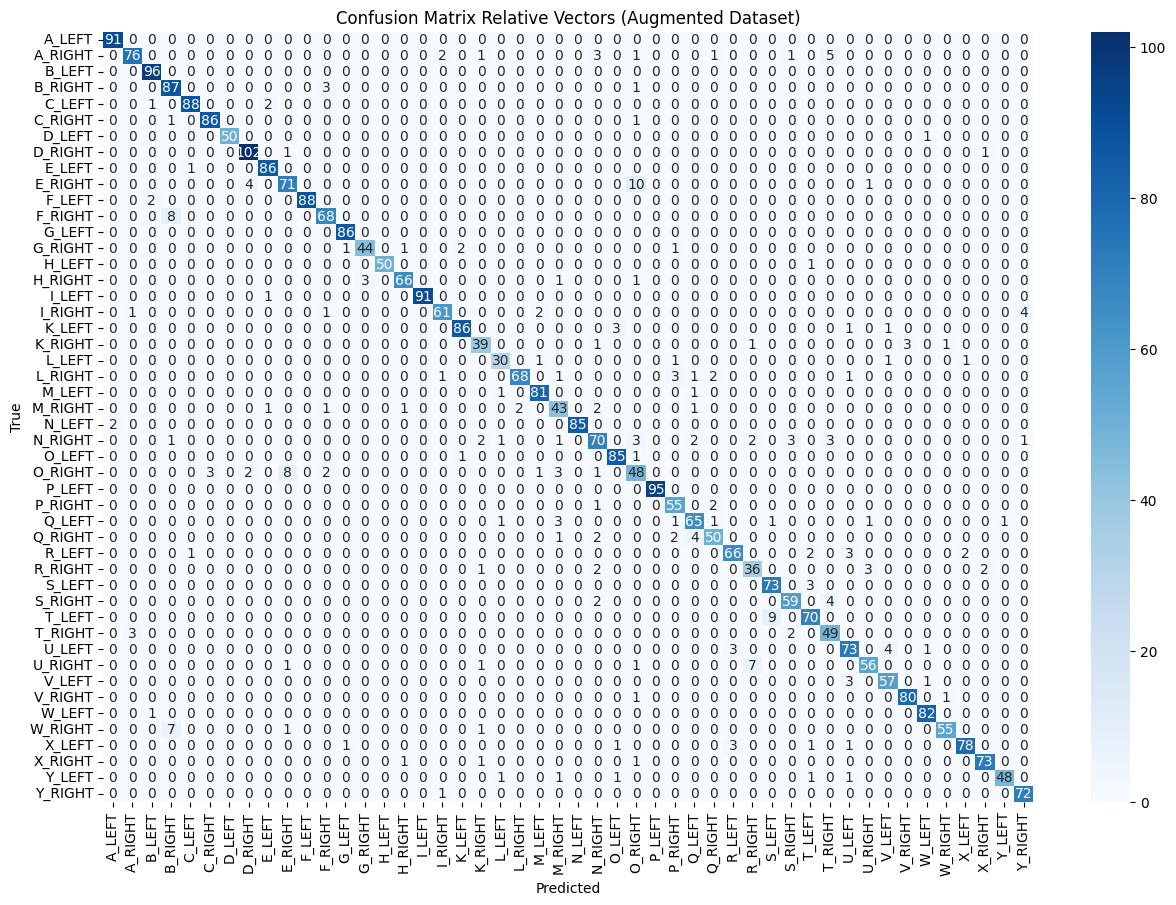

In [101]:
plt.figure(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels = alpha_dict.values(), yticklabels = alpha_dict.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Relative Vectors (Augmented Dataset)')
plt.savefig('Confusion_Matrix_Relative_Vectors_Aug.png')
plt.show()

<h2>kNN Algorithm with Euclidean Distances</h2>

In [102]:
df_euclid_without_label = df_euclid.copy()
df_euclid_without_label.drop(columns = ['Label'], axis=1, inplace=True)

In [103]:
df_euclid_without_label.head()

1         2         3         4         5         6         7  \
0  0.078186  0.156734  0.209405  0.237922  0.223260  0.310344  0.294451   
1  0.071038  0.135689  0.179481  0.211314  0.174289  0.257440  0.254032   
2  0.060105  0.120701  0.169371  0.205262  0.178105  0.249398  0.244143   
3  0.074935  0.141860  0.188026  0.220388  0.175995  0.261918  0.260656   
4  0.064073  0.126842  0.174161  0.208909  0.197546  0.270866  0.256880   

          8         9        10  ...       201       202       203       204  \
0  0.264745  0.232604  0.339843  ...  0.245459  0.171683  0.128026  0.093421   
1  0.241403  0.180689  0.286159  ...  0.254096  0.180079  0.132797  0.097363   
2  0.225072  0.190356  0.277156  ...  0.207872  0.146004  0.106810  0.077318   
3  0.246962  0.187625  0.290776  ...  0.242714  0.169661  0.125415  0.093862   
4  0.234637  0.207501  0.299277  ...  0.224639  0.157661  0.117880  0.087991   

        205       206       207       208       209       210  
0  0.079873  0.128244  0.170347  0.048939  0.091458  0.042549  
1  0.080374  0.132814  0.175787  0.052870  0.096342  0.043574  
2  0.069548  0.113914  0.151408  0.044876  0.082820  0.037994  
3  0.081567  0.132525  0.172740  0.051430  0.092282  0.041017  
4  0.073710  0.119533  0.158517  0.046212  0.085539  0.039367  

[5 rows x 210 columns]

In [104]:
X_euclid = df_euclid_without_label.copy()
y_euclid = df_euclid['Label']
X_train_euclid, X_test_euclid, y_train_euclid, y_test_euclid = train_test_split(X_euclid, y_euclid, test_size=0.3, random_state=42)

In [105]:
print("Training set:")
print(X_train_euclid)
print(y_train_euclid)
print("Testing set:")
print(X_test_euclid)
print(y_test_euclid)

Training set:
              1         2         3         4         5         6         7  \
8140   0.110889  0.205418  0.280268  0.338036  0.256783  0.314671  0.336855   
5147   0.032877  0.074865  0.105414  0.117934  0.105030  0.144327  0.152860   
5853   0.023520  0.047766  0.062864  0.074556  0.084800  0.124165  0.150553   
9899   0.036020  0.071897  0.092624  0.103948  0.094119  0.127396  0.122635   
3166   0.041738  0.075916  0.091482  0.107572  0.139568  0.203175  0.245912   
...         ...       ...       ...       ...       ...       ...       ...   
11284  0.057123  0.110270  0.148903  0.178543  0.161500  0.236476  0.280861   
5191   0.032379  0.069079  0.095527  0.102592  0.103619  0.147777  0.150146   
5390   0.058613  0.121918  0.169435  0.166182  0.185757  0.272176  0.325676   
860    0.040426  0.081837  0.111922  0.124946  0.140496  0.210372  0.256531   
7270   0.038644  0.072162  0.098123  0.116479  0.116791  0.166384  0.196024   

              8         9        10  

In [106]:
print(f"X_train_euclid type: {type(X_train_euclid)}, shape: {X_train.shape}")
print(f"X_test_euclid type: {type(X_test_euclid)}, shape: {X_test_euclid.shape}")
print(f"y_train_euclid type: {type(y_train_euclid)}, shape: {X_train.shape}")
print(f"y_test_euclid type: {type(y_test_euclid)}, shape: {y_test_euclid.shape}")

X_train_euclid type: <class 'pandas.core.frame.DataFrame'>, shape: torch.Size([8335, 60])
X_test_euclid type: <class 'pandas.core.frame.DataFrame'>, shape: (3573, 210)
y_train_euclid type: <class 'pandas.core.series.Series'>, shape: torch.Size([8335, 60])
y_test_euclid type: <class 'pandas.core.series.Series'>, shape: (3573,)


In [107]:
y_train_euclid.head()

8140    13
5147    28
5853    41
9899    25
3166    39
Name: Label, dtype: int64

In [108]:
y_test_euclid.head()

1701    42
9367    16
9309    16
673      6
4047    46
Name: Label, dtype: int64

In [109]:
X_train_euclid.head()

1         2         3         4         5         6         7  \
8140  0.110889  0.205418  0.280268  0.338036  0.256783  0.314671  0.336855   
5147  0.032877  0.074865  0.105414  0.117934  0.105030  0.144327  0.152860   
5853  0.023520  0.047766  0.062864  0.074556  0.084800  0.124165  0.150553   
9899  0.036020  0.071897  0.092624  0.103948  0.094119  0.127396  0.122635   
3166  0.041738  0.075916  0.091482  0.107572  0.139568  0.203175  0.245912   

             8         9        10  ...       201       202       203  \
8140  0.353598  0.210574  0.268364  ...  0.067834  0.065342  0.065785   
5147  0.142696  0.104488  0.148391  ...  0.063311  0.042880  0.031239   
5853  0.172493  0.086311  0.138721  ...  0.042451  0.038922  0.020683   
9899  0.112475  0.088728  0.124654  ...  0.054127  0.058304  0.031845   
3166  0.280568  0.136400  0.208403  ...  0.052056  0.039820  0.024319   

           204       205       206       207       208       209       210  
8140  0.051156  0.109846  0.101533  0.070868  0.025480  0.051233  0.033353  
5147  0.021841  0.035219  0.052703  0.059223  0.019227  0.028765  0.011205  
5853  0.016796  0.022833  0.024442  0.033016  0.020108  0.037860  0.018280  
9899  0.017593  0.019806  0.023466  0.042006  0.027541  0.051517  0.024271  
3166  0.031462  0.025846  0.035856  0.050141  0.027024  0.048820  0.022343  

[5 rows x 210 columns]

In [110]:
X_test_euclid.head()

1         2         3         4         5         6         7  \
1701  0.068184  0.117132  0.130102  0.155239  0.194056  0.311493  0.385379   
9367  0.057520  0.113730  0.149876  0.170915  0.118651  0.179756  0.216429   
9309  0.056093  0.108685  0.136929  0.155424  0.148494  0.201822  0.233152   
673   0.056616  0.116339  0.156453  0.163658  0.182070  0.248972  0.266049   
4047  0.033772  0.069840  0.089712  0.092240  0.101704  0.149607  0.180356   

             8         9        10  ...       201       202       203  \
1701  0.442466  0.188794  0.305976  ...  0.128088  0.081696  0.037432   
9367  0.244809  0.102287  0.171344  ...  0.065881  0.042620  0.028082   
9309  0.259689  0.127501  0.187153  ...  0.015175  0.036276  0.027400   
673   0.250004  0.177096  0.254384  ...  0.075176  0.048617  0.038117   
4047  0.205996  0.092257  0.129738  ...  0.045564  0.040869  0.016054   

           204       205       206       207       208       209       210  
1701  0.039398  0.061822  0.105292  0.134544  0.054706  0.092416  0.039356  
9367  0.029186  0.051190  0.049346  0.037983  0.016282  0.033922  0.020657  
9309  0.024827  0.034452  0.021175  0.016816  0.020058  0.037512  0.017985  
673   0.034445  0.057767  0.063742  0.046859  0.012014  0.022092  0.020090  
4047  0.019380  0.025501  0.030901  0.036657  0.026895  0.042893  0.017994  

[5 rows x 210 columns]

In [111]:
scaler = StandardScaler() 
X_train_euclid = scaler.fit_transform(X_train_euclid)
X_test_euclid = scaler.transform(X_test_euclid)

In [112]:
X_train_euclid = torch.from_numpy(X_train_euclid)
X_test_euclid = torch.from_numpy(X_test_euclid)
y_train_euclid = torch.tensor(y_train_euclid.to_numpy())
y_test_euclid = torch.tensor(y_test_euclid.to_numpy()) 

In [113]:
print(type(X_train_euclid))
print(type(X_test_euclid))
print(type(y_train_euclid))
print(type(y_test_euclid))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [114]:
pred_test_euclid = train_knn(X_train_euclid, X_test_euclid, y_train_euclid, y_test_euclid, k_neighbors=1)
print(classification_report(y_test_euclid, pred_test_euclid))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        91
           2       0.97      0.94      0.96        90
           3       1.00      1.00      1.00        96
           4       0.94      0.99      0.96        91
           5       0.96      0.99      0.97        91
           6       0.98      0.95      0.97        88
           7       0.87      0.92      0.90        51
           8       0.98      0.90      0.94       104
           9       0.92      0.94      0.93        87
          10       0.88      0.91      0.89        86
          11       0.99      1.00      0.99        90
          12       0.97      0.91      0.94        76
          13       0.99      0.97      0.98        86
          14       0.90      0.90      0.90        49
          15       0.98      0.96      0.97        51
          16       0.93      0.87      0.90        71
          17       0.98      0.96      0.97        92
          18       0.97    

In [115]:
from sklearn.metrics import confusion_matrix
conf_mat_euclid = confusion_matrix(y_test_euclid, pred_test_euclid)

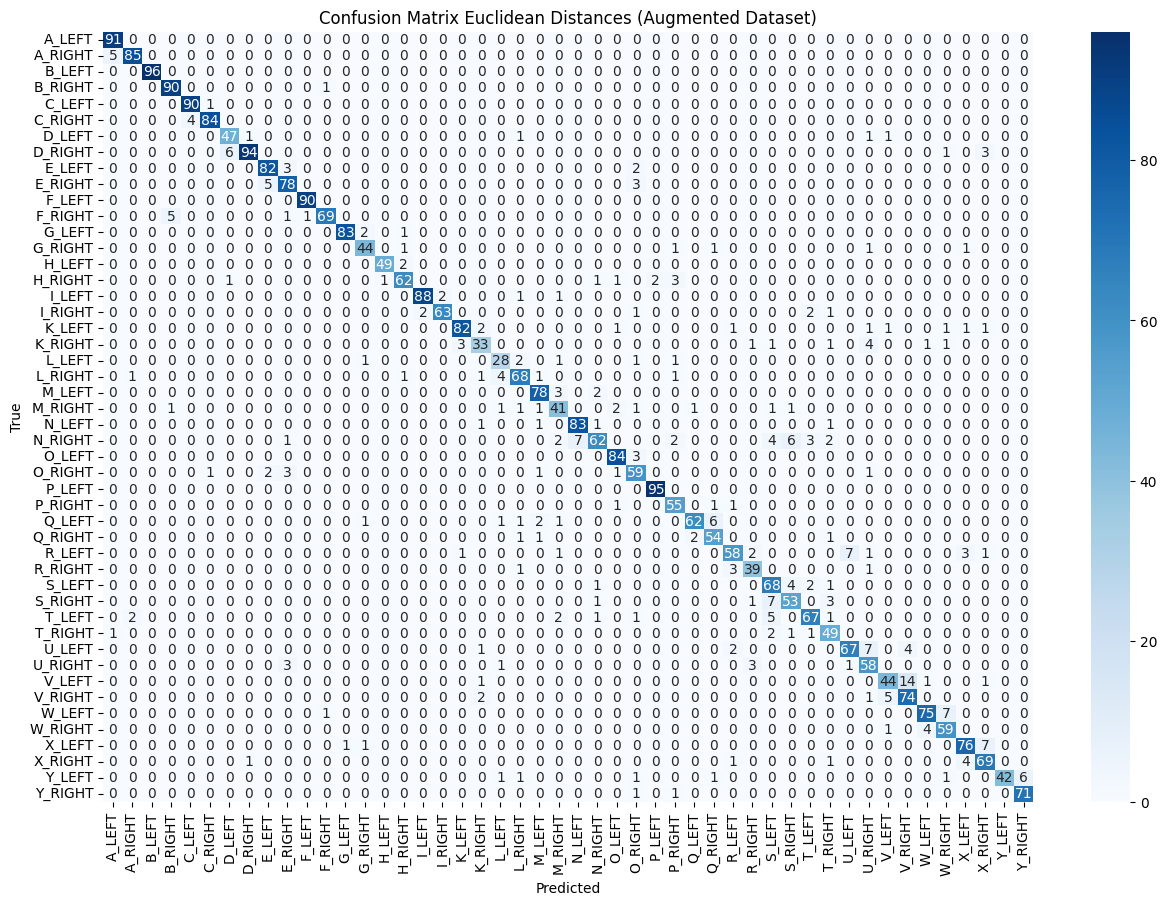

In [116]:
plt.figure(figsize=(15, 10))
sns.heatmap(conf_mat_euclid, annot=True, fmt='d', cmap='Blues', xticklabels = alpha_dict.values(), yticklabels = alpha_dict.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Euclidean Distances (Augmented Dataset)')
plt.savefig('Confusion_Matrix_Euclidean_Distances_Aug.png')
plt.show()

<h2>kNN Algorithm with Euclidean Distances without the Z-component</h2>

In [117]:
df_euclid_without_z_without_label = df_euclid_without_z.copy()
df_euclid_without_z_without_label.drop(columns = ['Label'], axis=1, inplace=True)

In [118]:
df_euclid_without_z.head()

Label         1         2         3         4         5         6  \
0     11  0.062569  0.119224  0.151987  0.171023  0.166752  0.237668   
1     11  0.064175  0.128800  0.178456  0.213729  0.194279  0.268996   
2     11  0.070757  0.136509  0.175181  0.195145  0.191910  0.258653   
3     11  0.074950  0.151705  0.199692  0.225621  0.217883  0.294709   
4     11  0.067447  0.131499  0.174571  0.201378  0.168004  0.238776   

          7         8         9  ...       201       202       203       204  \
0  0.216723  0.190002  0.171578  ...  0.248835  0.177323  0.130312  0.094309   
1  0.256834  0.230071  0.206725  ...  0.221006  0.155152  0.113134  0.081289   
2  0.237728  0.206543  0.198556  ...  0.203879  0.144800  0.108431  0.078946   
3  0.272905  0.238516  0.226131  ...  0.227908  0.158904  0.117940  0.086479   
4  0.232979  0.214670  0.172978  ...  0.225279  0.160170  0.118262  0.084202   

        205       206       207       208       209       210  
0  0.077872  0.130294  0.173695  0.052562  0.096119  0.043587  
1  0.074253  0.122172  0.162921  0.048248  0.089279  0.041061  
2  0.064209  0.104553  0.138781  0.040455  0.074858  0.034454  
3  0.074572  0.120202  0.158337  0.045717  0.083940  0.038235  
4  0.071219  0.118393  0.159962  0.047293  0.089029  0.041778  

[5 rows x 211 columns]

In [119]:
df_euclid_without_z_without_label.head()

1         2         3         4         5         6         7  \
0  0.062569  0.119224  0.151987  0.171023  0.166752  0.237668  0.216723   
1  0.064175  0.128800  0.178456  0.213729  0.194279  0.268996  0.256834   
2  0.070757  0.136509  0.175181  0.195145  0.191910  0.258653  0.237728   
3  0.074950  0.151705  0.199692  0.225621  0.217883  0.294709  0.272905   
4  0.067447  0.131499  0.174571  0.201378  0.168004  0.238776  0.232979   

          8         9        10  ...       201       202       203       204  \
0  0.190002  0.171578  0.270277  ...  0.248835  0.177323  0.130312  0.094309   
1  0.230071  0.206725  0.298984  ...  0.221006  0.155152  0.113134  0.081289   
2  0.206543  0.198556  0.286594  ...  0.203879  0.144800  0.108431  0.078946   
3  0.238516  0.226131  0.324318  ...  0.227908  0.158904  0.117940  0.086479   
4  0.214670  0.172978  0.265450  ...  0.225279  0.160170  0.118262  0.084202   

        205       206       207       208       209       210  
0  0.077872  0.130294  0.173695  0.052562  0.096119  0.043587  
1  0.074253  0.122172  0.162921  0.048248  0.089279  0.041061  
2  0.064209  0.104553  0.138781  0.040455  0.074858  0.034454  
3  0.074572  0.120202  0.158337  0.045717  0.083940  0.038235  
4  0.071219  0.118393  0.159962  0.047293  0.089029  0.041778  

[5 rows x 210 columns]

In [120]:
X_euclid_without_z = df_euclid_without_z_without_label.copy()
y_euclid_without_z = df_euclid_without_z['Label']
X_train_euclid_without_z, X_test_euclid_without_z, y_train_euclid_without_z, y_test_euclid_without_z = train_test_split(X_euclid_without_z, y_euclid_without_z, test_size=0.3, random_state=42)

In [121]:
print("Training set:")
print(X_train_euclid_without_z)
print(y_train_euclid_without_z)
print("Testing set:")
print(X_test_euclid_without_z)
print(y_test_euclid_without_z)

Training set:
              1         2         3         4         5         6         7  \
8140   0.083440  0.167029  0.225117  0.274154  0.177941  0.240026  0.273020   
5147   0.066162  0.153725  0.235660  0.269303  0.228592  0.305529  0.324017   
5853   0.032963  0.063190  0.085155  0.106672  0.124486  0.176237  0.208340   
9899   0.052069  0.099349  0.128504  0.148291  0.128045  0.171427  0.150439   
3166   0.032183  0.059433  0.076675  0.089317  0.113581  0.160968  0.192279   
...         ...       ...       ...       ...       ...       ...       ...   
11284  0.034178  0.065800  0.085926  0.097762  0.104859  0.148614  0.178544   
5191   0.035970  0.077303  0.106232  0.116966  0.113289  0.159322  0.167380   
5390   0.057413  0.113512  0.145054  0.160705  0.188225  0.271594  0.323334   
860    0.039863  0.078304  0.100041  0.109523  0.158461  0.237652  0.294101   
7270   0.032196  0.068328  0.089933  0.095687  0.118267  0.158150  0.183083   

              8         9        10  

In [122]:
print(f"X_train_euclid type: {type(X_train_euclid_without_z)}, shape: {X_train_euclid_without_z.shape}")
print(f"X_test_euclid type: {type(X_test_euclid_without_z)}, shape: {X_test_euclid_without_z.shape}")
print(f"y_train_euclid type: {type(y_train_euclid_without_z)}, shape: {y_train_euclid_without_z.shape}")
print(f"y_test_euclid type: {type(y_test_euclid_without_z)}, shape: {y_test_euclid_without_z.shape}")

X_train_euclid type: <class 'pandas.core.frame.DataFrame'>, shape: (8335, 210)
X_test_euclid type: <class 'pandas.core.frame.DataFrame'>, shape: (3573, 210)
y_train_euclid type: <class 'pandas.core.series.Series'>, shape: (8335,)
y_test_euclid type: <class 'pandas.core.series.Series'>, shape: (3573,)


In [123]:
X_train_euclid_without_z.head()

1         2         3         4         5         6         7  \
8140  0.083440  0.167029  0.225117  0.274154  0.177941  0.240026  0.273020   
5147  0.066162  0.153725  0.235660  0.269303  0.228592  0.305529  0.324017   
5853  0.032963  0.063190  0.085155  0.106672  0.124486  0.176237  0.208340   
9899  0.052069  0.099349  0.128504  0.148291  0.128045  0.171427  0.150439   
3166  0.032183  0.059433  0.076675  0.089317  0.113581  0.160968  0.192279   

             8         9        10  ...       201       202       203  \
8140  0.295681  0.136797  0.209160  ...  0.049715  0.056236  0.050461   
5147  0.310232  0.229025  0.313175  ...  0.100626  0.063951  0.049571   
5853  0.233490  0.118435  0.177171  ...  0.022581  0.017035  0.024199   
9899  0.126254  0.119608  0.168319  ...  0.056542  0.060227  0.030891   
3166  0.216972  0.110658  0.166094  ...  0.029044  0.027384  0.017152   

           204       205       206       207       208       209       210  
8140  0.047557  0.077779  0.055983  0.026611  0.024929  0.054435  0.030651  
5147  0.031977  0.069301  0.091078  0.078897  0.025492  0.032056  0.024372  
5853  0.035561  0.007819  0.022877  0.035995  0.016302  0.029766  0.013484  
9899  0.021105  0.024389  0.026291  0.045225  0.031677  0.057273  0.025861  
3166  0.022740  0.015964  0.012219  0.022653  0.017987  0.033327  0.015481  

[5 rows x 210 columns]

In [124]:
X_test_euclid_without_z.head()

1         2         3         4         5         6         7  \
1701  0.014416  0.021148  0.018251  0.015059  0.060536  0.093963  0.115767   
9367  0.066320  0.122295  0.154783  0.176212  0.153145  0.208808  0.239538   
9309  0.053532  0.104857  0.133890  0.150321  0.129049  0.184831  0.221882   
673   0.054801  0.113171  0.154514  0.146979  0.177629  0.250268  0.262594   
4047  0.055379  0.105539  0.140313  0.158492  0.156829  0.222545  0.257964   

             8         9        10  ...       201       202       203  \
1701  0.132450  0.058634  0.094742  ...  0.022833  0.023285  0.013297   
9367  0.264626  0.131079  0.193406  ...  0.017440  0.030207  0.024240   
9309  0.252303  0.108294  0.173445  ...  0.020093  0.030824  0.027090   
673   0.238130  0.166842  0.249687  ...  0.065530  0.044645  0.040131   
4047  0.279406  0.146425  0.192009  ...  0.052581  0.009465  0.014302   

           204       205       206       207       208       209       210  
1701  0.014016  0.004962  0.017356  0.029608  0.014955  0.027607  0.012667  
9367  0.026072  0.032928  0.017410  0.008961  0.018140  0.034924  0.017054  
9309  0.030514  0.030484  0.016165  0.010443  0.017097  0.034470  0.017543  
673   0.035559  0.055200  0.058822  0.041302  0.006289  0.017793  0.018882  
4047  0.026520  0.054425  0.059973  0.054783  0.022946  0.035973  0.016768  

[5 rows x 210 columns]

In [125]:
y_train_euclid_without_z.head()

8140    13
5147    28
5853    41
9899    25
3166    39
Name: Label, dtype: int64

In [126]:
y_test_euclid_without_z.head()

1701    42
9367    16
9309    16
673      6
4047    46
Name: Label, dtype: int64

In [127]:
scaler = StandardScaler() 
X_train_euclid_without_z = scaler.fit_transform(X_train_euclid_without_z)
X_test_euclid_without_z = scaler.transform(X_test_euclid_without_z)

In [128]:
X_train_euclid_without_z = torch.from_numpy(X_train_euclid_without_z)
X_test_euclid_without_z = torch.from_numpy(X_test_euclid_without_z)
y_train_euclid_without_z = torch.tensor(y_train_euclid_without_z.to_numpy())
y_test_euclid_without_z = torch.tensor(y_test_euclid_without_z.to_numpy()) 

In [129]:
print(type(X_train_euclid_without_z))
print(type(X_test_euclid_without_z))
print(type(y_train_euclid_without_z))
print(type(y_test_euclid_without_z))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [130]:
pred_test_euclid_without_z = train_knn(X_train_euclid_without_z, X_test_euclid_without_z, y_train_euclid_without_z, y_test_euclid_without_z, k_neighbors=1)
print(classification_report(y_test_euclid_without_z, pred_test_euclid_without_z))

              precision    recall  f1-score   support

           1       0.93      1.00      0.96        91
           2       0.95      0.92      0.94        90
           3       0.97      1.00      0.98        96
           4       0.98      0.96      0.97        91
           5       0.93      1.00      0.96        91
           6       1.00      0.91      0.95        88
           7       0.90      0.90      0.90        51
           8       0.96      0.95      0.96       104
           9       0.88      0.98      0.92        87
          10       0.88      0.80      0.84        86
          11       0.99      1.00      0.99        90
          12       0.99      0.97      0.98        76
          13       0.94      0.99      0.97        86
          14       0.93      0.84      0.88        49
          15       0.88      0.96      0.92        51
          16       0.91      0.82      0.86        71
          17       0.94      0.91      0.93        92
          18       0.95    

In [131]:
from sklearn.metrics import confusion_matrix
conf_mat_euclid_without_z = confusion_matrix(y_test_euclid_without_z, pred_test_euclid_without_z)

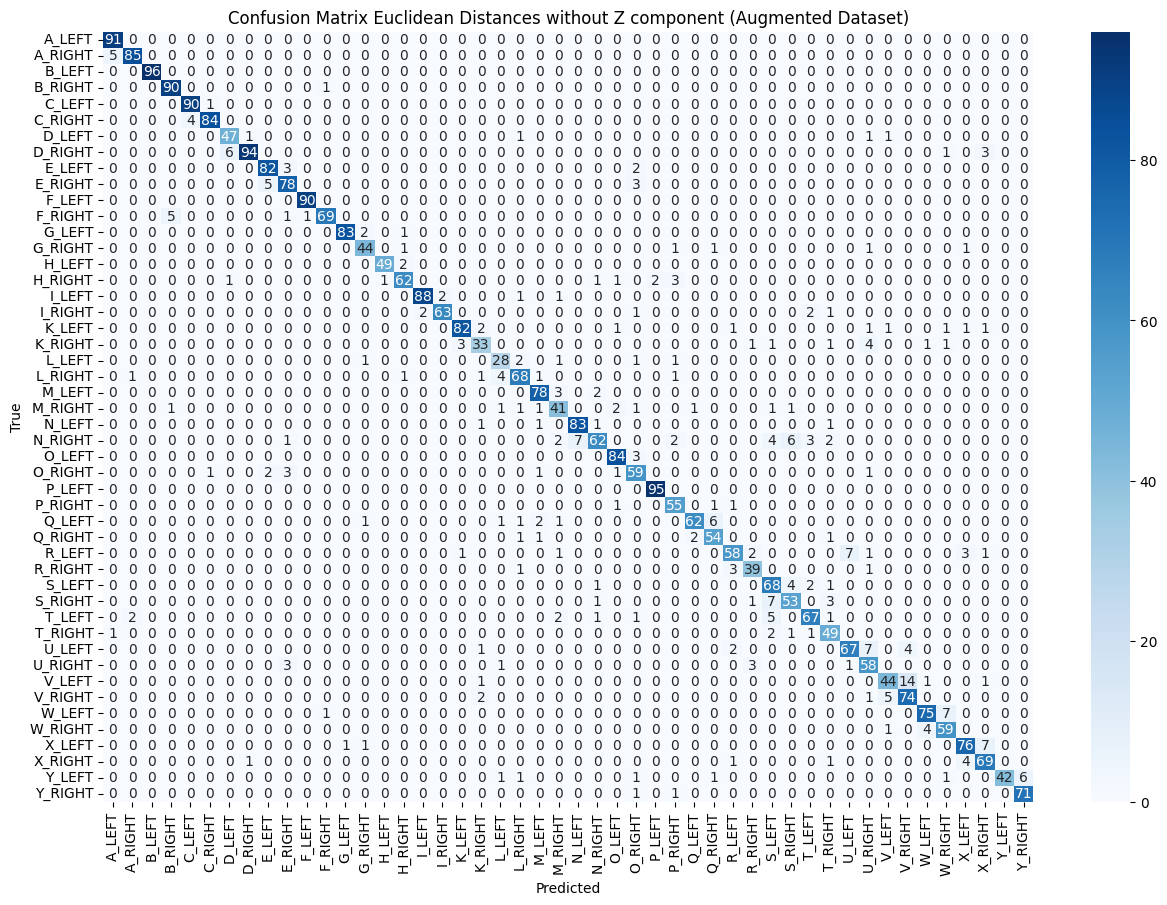

In [132]:
plt.figure(figsize=(15, 10))
sns.heatmap(conf_mat_euclid, annot=True, fmt='d', cmap='Blues', xticklabels = alpha_dict.values(), yticklabels = alpha_dict.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Euclidean Distances without Z component (Augmented Dataset)')
plt.savefig('Confusion_Matrix_Euclidean_Distances_without_Z.png')
plt.show()

<h1>KNN Algorithm using the ASL Dataset</h1>

<h2>KNN Alg. with Euclidean Distances</h2>

In [133]:
df_euclid_asl = pd.read_csv('/HDD-1T/KNN_asl_alphabet_train/df_euclid_asl.csv')

In [134]:
df_euclid_without_label_asl = df_euclid_asl.copy()
df_euclid_without_label_asl.drop(columns = ['Label'], axis=1, inplace=True)

In [135]:
df_euclid_asl.head()

Label         1         2         3         4         5         6  \
0     10  0.107950  0.203843  0.270192  0.322981  0.280089  0.394483   
1     10  0.092322  0.173566  0.225164  0.257551  0.208282  0.301944   
2     10  0.095732  0.181383  0.242728  0.293142  0.237405  0.339178   
3     10  0.138442  0.260083  0.345569  0.414528  0.329907  0.476544   
4     10  0.129749  0.243836  0.325489  0.391909  0.315723  0.452588   

          7         8         9  ...       201       202       203       204  \
0  0.466870  0.527463  0.254155  ...  0.079087  0.092689  0.054189  0.054294   
1  0.359846  0.408929  0.193720  ...  0.083541  0.086469  0.048102  0.052425   
2  0.404419  0.460798  0.219209  ...  0.077416  0.086280  0.048228  0.051156   
3  0.567070  0.646834  0.306927  ...  0.114662  0.120066  0.071451  0.072048   
4  0.536031  0.607261  0.287878  ...  0.111701  0.119834  0.065263  0.064947   

        205       206       207       208       209       210  
0  0.076280  0.053765  0.056001  0.055322  0.097866  0.044458  
1  0.067542  0.048280  0.051874  0.048322  0.089489  0.042913  
2  0.074620  0.059200  0.063820  0.054124  0.095234  0.042924  
3  0.103641  0.090625  0.099696  0.072995  0.127944  0.057034  
4  0.102646  0.088209  0.100308  0.076226  0.133657  0.059490  

[5 rows x 211 columns]

In [136]:
df_euclid_without_label_asl.head()

1         2         3         4         5         6         7  \
0  0.107950  0.203843  0.270192  0.322981  0.280089  0.394483  0.466870   
1  0.092322  0.173566  0.225164  0.257551  0.208282  0.301944  0.359846   
2  0.095732  0.181383  0.242728  0.293142  0.237405  0.339178  0.404419   
3  0.138442  0.260083  0.345569  0.414528  0.329907  0.476544  0.567070   
4  0.129749  0.243836  0.325489  0.391909  0.315723  0.452588  0.536031   

          8         9        10  ...       201       202       203       204  \
0  0.527463  0.254155  0.373069  ...  0.079087  0.092689  0.054189  0.054294   
1  0.408929  0.193720  0.295454  ...  0.083541  0.086469  0.048102  0.052425   
2  0.460798  0.219209  0.326968  ...  0.077416  0.086280  0.048228  0.051156   
3  0.646834  0.306927  0.462793  ...  0.114662  0.120066  0.071451  0.072048   
4  0.607261  0.287878  0.428705  ...  0.111701  0.119834  0.065263  0.064947   

        205       206       207       208       209       210  
0  0.076280  0.053765  0.056001  0.055322  0.097866  0.044458  
1  0.067542  0.048280  0.051874  0.048322  0.089489  0.042913  
2  0.074620  0.059200  0.063820  0.054124  0.095234  0.042924  
3  0.103641  0.090625  0.099696  0.072995  0.127944  0.057034  
4  0.102646  0.088209  0.100308  0.076226  0.133657  0.059490  

[5 rows x 210 columns]

In [137]:
X_euclid_asl = df_euclid_without_label_asl.copy()
y_euclid_asl = df_euclid_asl['Label']
X_train_euclid_asl, X_test_euclid_asl, y_train_euclid_asl, y_test_euclid_asl = train_test_split(X_euclid_asl, 
                                                                                                y_euclid_asl, 
                                                                                                test_size=0.3, 
                                                                                                random_state=42)

In [138]:
print(f"X_train_euclid type: {type(X_train_euclid_asl)}, shape: {X_train_euclid_asl.shape}")
print(f"X_test_euclid type: {type(X_test_euclid_asl)}, shape: {X_test_euclid_asl.shape}")
print(f"y_train_euclid type: {type(y_train_euclid_asl)}, shape: {y_train_euclid_asl.shape}")
print(f"y_test_euclid type: {type(y_test_euclid_asl)}, shape: {y_test_euclid_asl.shape}")

X_train_euclid type: <class 'pandas.core.frame.DataFrame'>, shape: (3854, 210)
X_test_euclid type: <class 'pandas.core.frame.DataFrame'>, shape: (1653, 210)
y_train_euclid type: <class 'pandas.core.series.Series'>, shape: (3854,)
y_test_euclid type: <class 'pandas.core.series.Series'>, shape: (1653,)


In [139]:
X_train_euclid_asl.head()

1         2         3         4         5         6         7  \
3463  0.108276  0.204038  0.252026  0.286075  0.289982  0.409052  0.485035   
4561  0.179788  0.304472  0.379263  0.449423  0.427490  0.524034  0.599745   
3968  0.101659  0.181861  0.219325  0.255097  0.253113  0.343223  0.409692   
5350  0.092940  0.185639  0.240301  0.271905  0.180331  0.217143  0.174683   
2052  0.147651  0.262375  0.360759  0.391421  0.336370  0.480939  0.581210   

             8         9        10  ...       201       202       203  \
3463  0.542773  0.269938  0.406867  ...  0.115014  0.108965  0.053931   
4561  0.659869  0.389230  0.496803  ...  0.446648  0.293468  0.202158   
3968  0.464610  0.232500  0.355776  ...  0.089749  0.098437  0.051023   
5350  0.135800  0.159375  0.204456  ...  0.074376  0.123101  0.161806   
2052  0.659066  0.328045  0.481071  ...  0.257227  0.170726  0.091539   

           204       205       206       207       208       209       210  
3463  0.064717  0.086325  0.071163  0.082661  0.066465  0.122158  0.058371  
4561  0.135073  0.157119  0.246915  0.313942  0.092573  0.160841  0.068354  
3968  0.052527  0.072446  0.062404  0.076564  0.063509  0.109127  0.047792  
5350  0.196098  0.063163  0.102563  0.135646  0.040876  0.074866  0.034398  
2052  0.024911  0.139413  0.200553  0.239902  0.084148  0.147095  0.067143  

[5 rows x 210 columns]

In [140]:
y_train_euclid_asl.head()

3463    20
4561    12
3968    17
5350    24
2052     4
Name: Label, dtype: int64

In [141]:
X_test_euclid_asl.head()

1         2         3         4         5         6         7  \
1433  0.254420  0.432294  0.574201  0.711894  0.406568  0.623617  0.763087   
1200  0.126890  0.242242  0.283585  0.270441  0.278099  0.346663  0.282288   
4501  0.219574  0.367691  0.469293  0.561000  0.443638  0.577733  0.620151   
4552  0.090900  0.152325  0.195872  0.247825  0.230430  0.263430  0.310945   
1867  0.135221  0.241141  0.332771  0.420185  0.324243  0.456814  0.545212   

             8         9        10  ...       201       202       203  \
1433  0.873899  0.392046  0.620088  ...  0.230499  0.144028  0.077480   
1200  0.258391  0.252701  0.333088  ...  0.100558  0.139735  0.078206   
4501  0.645685  0.407956  0.552328  ...  0.308904  0.236991  0.132559   
4552  0.352052  0.230805  0.261291  ...  0.292773  0.186765  0.115723   
1867  0.620578  0.324371  0.475404  ...  0.278963  0.209817  0.130039   

           204       205       206       207       208       209       210  
1433  0.040191  0.176169  0.208073  0.197029  0.074216  0.120561  0.061194  
1200  0.065313  0.066526  0.029488  0.057801  0.073431  0.118530  0.046708  
4501  0.077926  0.128115  0.199788  0.249037  0.110225  0.180288  0.072283  
4552  0.065388  0.111101  0.179894  0.227972  0.071987  0.122700  0.051638  
1867  0.065967  0.136946  0.190538  0.220941  0.083482  0.147587  0.070981  

[5 rows x 210 columns]

In [142]:
y_test_euclid_asl.head()

1433    16
1200    18
4501    12
4552    12
1867     4
Name: Label, dtype: int64

In [143]:
scaler = StandardScaler() 
X_train_euclid_asl = scaler.fit_transform(X_train_euclid_asl)
X_test_euclid_asl = scaler.transform(X_test_euclid_asl)

In [144]:
X_train_euclid_asl = torch.from_numpy(X_train_euclid_asl)
X_test_euclid_asl = torch.from_numpy(X_test_euclid_asl)
y_train_euclid_asl = torch.tensor(y_train_euclid_asl.to_numpy())
y_test_euclid_asl = torch.tensor(y_test_euclid_asl.to_numpy()) 

In [145]:
print(type(X_train_euclid_asl))
print(type(X_test_euclid_asl))
print(type(y_train_euclid_asl))
print(type(y_test_euclid_asl))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [146]:
pred_test_euclid_asl = train_knn(X_train_euclid_asl, X_test_euclid_asl, y_train_euclid_asl, y_test_euclid_asl, k_neighbors=1)
print(classification_report(y_test_euclid_asl, pred_test_euclid_asl))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        56
           2       1.00      1.00      1.00        51
           3       0.94      0.98      0.96        64
           4       1.00      0.93      0.96        68
           5       0.99      0.99      0.99        86
           6       0.98      0.99      0.98        97
           7       1.00      0.99      0.99        78
           8       1.00      0.94      0.97        64
           9       0.99      0.99      0.99        69
          10       0.99      0.98      0.98        96
          11       1.00      1.00      1.00        85
          12       0.88      0.95      0.91        44
          13       0.93      0.90      0.91        48
          14       0.96      0.99      0.98        80
          15       0.96      0.94      0.95        51
          16       0.97      0.94      0.96        72
          17       0.97      0.99      0.98        67
          18       1.00    

In [147]:
from sklearn.metrics import confusion_matrix
conf_mat_euclid_asl = confusion_matrix(y_test_euclid_asl, pred_test_euclid_asl)

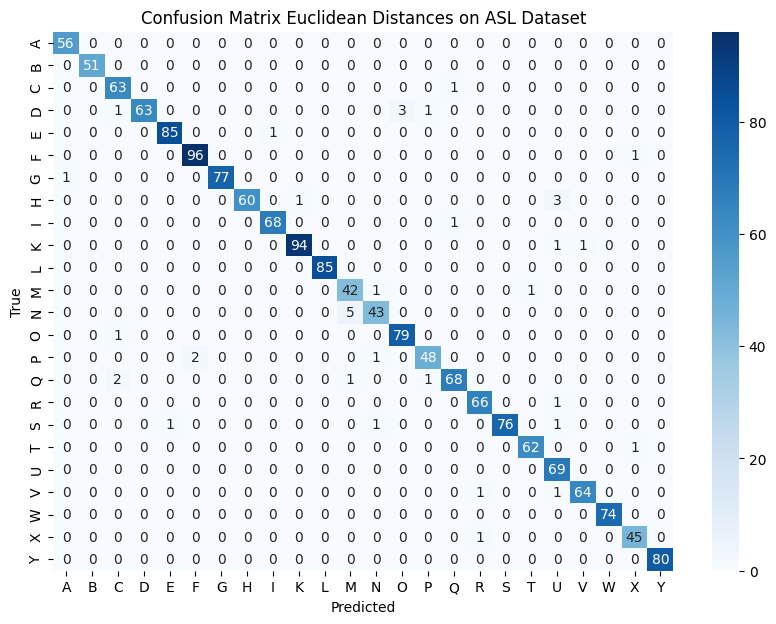

In [148]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat_euclid_asl, annot=True, fmt='d', cmap='Blues', xticklabels = alpha_dict_asl.values(), yticklabels = alpha_dict_asl.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Euclidean Distances on ASL Dataset')
plt.savefig('Confusion_Matrix_Euclidean_Distances_ASL.png')
plt.show()

<h2>KNN Alg. with Euclidean Distances without Z-component</h2>

In [149]:
df_euclid_without_z_asl = pd.read_csv('/HDD-1T/KNN_asl_alphabet_train/df_euclid_without_z_asl.csv')

In [150]:
df_euclid_without_z_without_label_asl = df_euclid_without_z_asl.copy()
df_euclid_without_z_without_label_asl.drop(columns = ['Label'], axis=1, inplace=True)

In [151]:
df_euclid_without_z_without_label_asl.head()

1         2         3         4         5         6         7  \
0  0.122858  0.248055  0.334147  0.403749  0.328392  0.471678  0.559800   
1  0.076146  0.143938  0.188111  0.207346  0.170555  0.232060  0.278350   
2  0.097304  0.199629  0.272311  0.333634  0.293787  0.419650  0.495771   
3  0.096270  0.189341  0.252954  0.305176  0.261315  0.371722  0.439587   
4  0.133393  0.251111  0.323770  0.387515  0.324151  0.463229  0.549012   

          8         9        10  ...       201       202       203       204  \
0  0.638196  0.305591  0.456518  ...  0.088823  0.119801  0.069741  0.072128   
1  0.316247  0.157337  0.204109  ...  0.052694  0.065068  0.036780  0.020509   
2  0.561960  0.271357  0.405846  ...  0.075767  0.108831  0.062102  0.061772   
3  0.497892  0.243501  0.359923  ...  0.058351  0.087530  0.049639  0.051239   
4  0.624451  0.299404  0.450171  ...  0.107212  0.138497  0.072034  0.065742   

        205       206       207       208       209       210  
0  0.062830  0.019498  0.067821  0.072837  0.127755  0.054987  
1  0.038375  0.027591  0.032456  0.028823  0.052120  0.023831  
2  0.052336  0.016527  0.063069  0.066635  0.114665  0.048051  
3  0.045991  0.009587  0.046346  0.053319  0.092036  0.038839  
4  0.070497  0.036490  0.079928  0.078127  0.140499  0.063169  

[5 rows x 210 columns]

In [152]:
df_euclid_without_z_asl.head()

Label         1         2         3         4         5         6  \
0     10  0.122858  0.248055  0.334147  0.403749  0.328392  0.471678   
1     10  0.076146  0.143938  0.188111  0.207346  0.170555  0.232060   
2     10  0.097304  0.199629  0.272311  0.333634  0.293787  0.419650   
3     10  0.096270  0.189341  0.252954  0.305176  0.261315  0.371722   
4     10  0.133393  0.251111  0.323770  0.387515  0.324151  0.463229   

          7         8         9  ...       201       202       203       204  \
0  0.559800  0.638196  0.305591  ...  0.088823  0.119801  0.069741  0.072128   
1  0.278350  0.316247  0.157337  ...  0.052694  0.065068  0.036780  0.020509   
2  0.495771  0.561960  0.271357  ...  0.075767  0.108831  0.062102  0.061772   
3  0.439587  0.497892  0.243501  ...  0.058351  0.087530  0.049639  0.051239   
4  0.549012  0.624451  0.299404  ...  0.107212  0.138497  0.072034  0.065742   

        205       206       207       208       209       210  
0  0.062830  0.019498  0.067821  0.072837  0.127755  0.054987  
1  0.038375  0.027591  0.032456  0.028823  0.052120  0.023831  
2  0.052336  0.016527  0.063069  0.066635  0.114665  0.048051  
3  0.045991  0.009587  0.046346  0.053319  0.092036  0.038839  
4  0.070497  0.036490  0.079928  0.078127  0.140499  0.063169  

[5 rows x 211 columns]

In [153]:
X_euclid_without_z_asl = df_euclid_without_z_without_label_asl.copy()
y_euclid_without_z_asl = df_euclid_without_z_asl['Label']
X_train_euclid_without_z_asl, X_test_euclid_without_z_asl, y_train_euclid_without_z_asl, y_test_euclid_without_z_asl = train_test_split(X_euclid_without_z_asl, 
                                                                                                                        y_euclid_without_z_asl, 
                                                                                                                        test_size=0.3, 
                                                                                                                        random_state=42)

In [154]:
print(f"X_train_euclid type: {type(X_train_euclid_without_z_asl)}, shape: {X_train_euclid_without_z_asl.shape}")
print(f"X_test_euclid type: {type(X_test_euclid_without_z_asl)}, shape: {X_test_euclid_without_z_asl.shape}")
print(f"y_train_euclid type: {type(y_train_euclid_without_z_asl)}, shape: {y_train_euclid_without_z_asl.shape}")
print(f"y_test_euclid type: {type(y_test_euclid_without_z_asl)}, shape: {y_test_euclid_without_z_asl.shape}")

X_train_euclid type: <class 'pandas.core.frame.DataFrame'>, shape: (3854, 210)
X_test_euclid type: <class 'pandas.core.frame.DataFrame'>, shape: (1653, 210)
y_train_euclid type: <class 'pandas.core.series.Series'>, shape: (3854,)
y_test_euclid type: <class 'pandas.core.series.Series'>, shape: (1653,)


In [155]:
X_train_euclid_without_z_asl.head()

1         2         3         4         5         6         7  \
3463  0.142781  0.286670  0.343086  0.363341  0.377322  0.534610  0.635135   
4561  0.108033  0.198907  0.266821  0.315434  0.116471  0.179987  0.258406   
3968  0.117900  0.240840  0.307274  0.392286  0.416578  0.557888  0.652819   
5350  0.140601  0.272421  0.370254  0.445925  0.284922  0.345912  0.257917   
2052  0.102786  0.186835  0.248883  0.298188  0.255158  0.364883  0.418404   

             8         9        10  ...       201       202       203  \
3463  0.716749  0.358919  0.537849  ...  0.185078  0.161443  0.077968   
4561  0.325636  0.039321  0.130238  ...  0.311718  0.216197  0.144698   
3968  0.735994  0.389159  0.585755  ...  0.087390  0.143990  0.060407   
5350  0.187955  0.264270  0.327453  ...  0.150756  0.245848  0.306774   
2052  0.465155  0.251357  0.344388  ...  0.162461  0.126485  0.086543   

           204       205       206       207       208       209       210  
3463  0.074174  0.098298  0.112125  0.143255  0.089244  0.162518  0.077742  
4561  0.090116  0.111787  0.183154  0.231562  0.075189  0.128538  0.054854  
3968  0.081380  0.067341  0.044387  0.128673  0.111678  0.195865  0.084301  
5350  0.369552  0.101442  0.163357  0.227760  0.062000  0.126334  0.064445  
2052  0.049239  0.093372  0.130202  0.146945  0.051642  0.086271  0.039058  

[5 rows x 210 columns]

In [156]:
X_test_euclid_without_z_asl.head()

1         2         3         4         5         6         7  \
1433  0.053704  0.141405  0.225800  0.294978  0.183802  0.276211  0.341650   
1200  0.146993  0.270140  0.301507  0.265487  0.322923  0.413166  0.328737   
4501  0.080480  0.150962  0.193887  0.228013  0.404165  0.267045  0.187688   
4552  0.087063  0.158561  0.173337  0.159865  0.326763  0.176348  0.091974   
1867  0.109639  0.195116  0.263781  0.323410  0.270788  0.382718  0.440465   

             8         9        10  ...       201       202       203  \
1433  0.394699  0.199467  0.291853  ...  0.148833  0.078320  0.040944   
1200  0.284587  0.287962  0.397317  ...  0.134422  0.162203  0.086935   
4501  0.173764  0.415558  0.289155  ...  0.281809  0.189294  0.120199   
4552  0.073794  0.320953  0.184726  ...  0.262637  0.186563  0.112461   
1867  0.484777  0.273411  0.396398  ...  0.176698  0.124355  0.089667   

           204       205       206       207       208       209       210  
1433  0.013137  0.080355  0.115452  0.136084  0.038649  0.065308  0.028658  
1200  0.065478  0.057211  0.047488  0.100610  0.085541  0.147579  0.062475  
4501  0.070941  0.105751  0.165318  0.212071  0.069271  0.118575  0.049335  
4552  0.067374  0.088239  0.163481  0.211352  0.078345  0.127847  0.049659  
1867  0.064763  0.090353  0.133600  0.156909  0.048815  0.078506  0.031361  

[5 rows x 210 columns]

In [157]:
y_train_euclid_without_z_asl.head()

3463    20
4561    12
3968    17
5350    24
2052     4
Name: Label, dtype: int64

In [158]:
y_test_euclid_without_z_asl.head()

1433    16
1200    18
4501    12
4552    12
1867     4
Name: Label, dtype: int64

In [159]:
scaler = StandardScaler() 
X_train_euclid_without_z_asl = scaler.fit_transform(X_train_euclid_without_z_asl)
X_test_euclid_without_z_asl = scaler.transform(X_test_euclid_without_z_asl)

In [160]:
X_train_euclid_without_z_asl = torch.from_numpy(X_train_euclid_without_z_asl)
X_test_euclid_without_z_asl = torch.from_numpy(X_test_euclid_without_z_asl)
y_train_euclid_without_z_asl = torch.tensor(y_train_euclid_without_z_asl.to_numpy())
y_test_euclid_without_z_asl = torch.tensor(y_test_euclid_without_z_asl.to_numpy()) 

In [161]:
print(type(X_train_euclid_without_z_asl))
print(type(X_test_euclid_without_z_asl))
print(type(y_train_euclid_without_z_asl))
print(type(y_test_euclid_without_z_asl))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [162]:
pred_test_euclid_without_z_asl = train_knn(X_train_euclid_without_z_asl, X_test_euclid_without_z_asl, y_train_euclid_without_z_asl, y_test_euclid_without_z_asl, k_neighbors=1)
print(classification_report(y_test_euclid_without_z_asl, pred_test_euclid_without_z_asl))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        56
           2       0.96      1.00      0.98        51
           3       0.95      0.98      0.97        64
           4       1.00      0.94      0.97        68
           5       0.99      1.00      0.99        86
           6       1.00      0.99      0.99        97
           7       0.97      1.00      0.99        78
           8       0.97      0.94      0.95        64
           9       1.00      0.99      0.99        69
          10       0.99      0.99      0.99        96
          11       1.00      1.00      1.00        85
          12       0.87      0.89      0.88        44
          13       1.00      0.88      0.93        48
          14       0.95      1.00      0.98        80
          15       0.96      1.00      0.98        51
          16       0.99      0.96      0.97        72
          17       0.94      0.96      0.95        67
          18       0.97    

In [163]:
from sklearn.metrics import confusion_matrix
conf_mat_euclid_without_z_asl = confusion_matrix(y_test_euclid_without_z_asl, pred_test_euclid_without_z_asl)

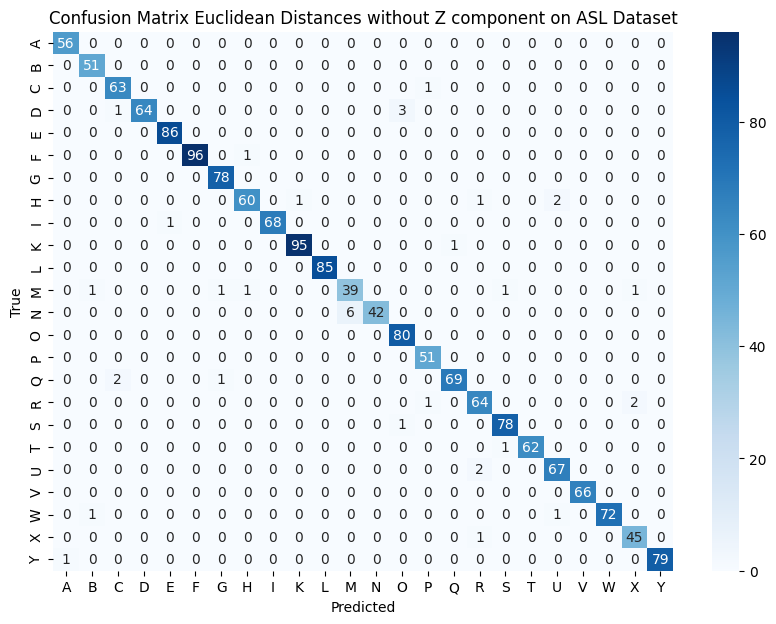

In [164]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat_euclid_without_z_asl, annot=True, fmt='d', cmap='Blues', xticklabels = alpha_dict_asl.values(), yticklabels = alpha_dict_asl.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Euclidean Distances without Z component on ASL Dataset')
plt.savefig('Confusion_Matrix_Euclidean_Distances_without_Z_ASL.png')
plt.show()

<h2>KNN Alg. with Relative Vectors</h2>

In [165]:
df_relative_vectors_asl = pd.read_csv('/HDD-1T/KNN_asl_alphabet_train/df_relative_vectors_asl.csv')

In [166]:
df_relative_vectors_asl.head()

Label         1         2         3         4         5         6  \
0     10  0.070030 -0.041503 -0.057248  0.079462 -0.137910 -0.076705   
1     10  0.071808 -0.075939 -0.056262  0.076326 -0.192601 -0.073475   
2     10  0.080171 -0.093308 -0.063501  0.100991 -0.226834 -0.077398   
3     10  0.074850 -0.019374 -0.055767  0.117187 -0.106142 -0.079113   
4     10  0.056423 -0.082285 -0.039696  0.068435 -0.184231 -0.053622   

          7         8         9  ...        51        52        53        54  \
0  0.020200 -0.207913 -0.089940  ... -0.048048 -0.126139 -0.152620 -0.105973   
1  0.000943 -0.275064 -0.086126  ... -0.044681 -0.133518 -0.205013 -0.114735   
2  0.040159 -0.332051 -0.086877  ... -0.039948 -0.123519 -0.261200 -0.122072   
3  0.092358 -0.190228 -0.097440  ... -0.059707 -0.068793 -0.169558 -0.124025   
4  0.005184 -0.258908 -0.066448  ... -0.034463 -0.102892 -0.214803 -0.082340   

         55        56        57        58        59        60  
0 -0.089553 -0.108518 -0.098162 -0.066466 -0.074888 -0.075479  
1 -0.079886 -0.151569 -0.108321 -0.052989 -0.101518 -0.083618  
2 -0.093065 -0.195175 -0.128512 -0.073410 -0.143793 -0.113464  
3 -0.046741 -0.108103 -0.114275 -0.034914 -0.059450 -0.088704  
4 -0.068359 -0.172199 -0.074935 -0.052968 -0.129879 -0.055442  

[5 rows x 61 columns]

In [167]:
df_relative_without_label_asl = df_relative_vectors_asl.copy()
df_relative_without_label_asl.drop(columns = ['Label'], axis=1, inplace=True)

In [168]:
df_relative_without_label_asl.head()

1         2         3         4         5         6         7  \
0  0.070030 -0.041503 -0.057248  0.079462 -0.137910 -0.076705  0.020200   
1  0.071808 -0.075939 -0.056262  0.076326 -0.192601 -0.073475  0.000943   
2  0.080171 -0.093308 -0.063501  0.100991 -0.226834 -0.077398  0.040159   
3  0.074850 -0.019374 -0.055767  0.117187 -0.106142 -0.079113  0.092358   
4  0.056423 -0.082285 -0.039696  0.068435 -0.184231 -0.053622  0.005184   

          8         9        10  ...        51        52        53        54  \
0 -0.207913 -0.089940 -0.027188  ... -0.048048 -0.126139 -0.152620 -0.105973   
1 -0.275064 -0.086126 -0.071692  ... -0.044681 -0.133518 -0.205013 -0.114735   
2 -0.332051 -0.086877 -0.021857  ... -0.039948 -0.123519 -0.261200 -0.122072   
3 -0.190228 -0.097440  0.051834  ... -0.059707 -0.068793 -0.169558 -0.124025   
4 -0.258908 -0.066448 -0.055538  ... -0.034463 -0.102892 -0.214803 -0.082340   

         55        56        57        58        59        60  
0 -0.089553 -0.108518 -0.098162 -0.066466 -0.074888 -0.075479  
1 -0.079886 -0.151569 -0.108321 -0.052989 -0.101518 -0.083618  
2 -0.093065 -0.195175 -0.128512 -0.073410 -0.143793 -0.113464  
3 -0.046741 -0.108103 -0.114275 -0.034914 -0.059450 -0.088704  
4 -0.068359 -0.172199 -0.074935 -0.052968 -0.129879 -0.055442  

[5 rows x 60 columns]

In [169]:
X_relative_asl = df_relative_without_label_asl.copy()
y_relative_asl = df_relative_vectors_asl['Label']
X_train_relative_asl, X_test_relative_asl, y_train_relative_asl, y_test_relative_asl = train_test_split(X_relative_asl, 
                                                                                                        y_relative_asl, 
                                                                                                        test_size=0.3, 
                                                                                                        random_state=42)

In [170]:
X_train_relative_asl.head()

1         2         3         4         5         6         7  \
3463  0.071820 -0.056295 -0.041340  0.105068 -0.140004 -0.056972  0.058977   
4561  0.064928  0.010206 -0.037671  0.126494  0.025983 -0.081697  0.148757   
3968  0.052126 -0.049575 -0.026039  0.066162 -0.124345 -0.035727  0.023667   
5350  0.150555 -0.073810 -0.099107  0.284983 -0.253516 -0.125869  0.344428   
2052  0.096137 -0.024549 -0.045258  0.153129 -0.083488 -0.064571  0.190199   

             8         9        10  ...        51        52        53  \
3463 -0.202778 -0.071957 -0.000281  ... -0.039386 -0.053796 -0.199936   
4561  0.043347 -0.125897  0.133464  ... -0.112864 -0.103295  0.030285   
3968 -0.174162 -0.045955 -0.025318  ... -0.042062 -0.070418 -0.164326   
5350 -0.408588 -0.145339  0.374596  ... -0.013169 -0.266220 -0.452247   
2052 -0.146242 -0.078174  0.221583  ...  0.023560  0.070030 -0.287195   

            54        55        56        57        58        59        60  
3463 -0.082410 -0.024393 -0.156492 -0.076595 -0.017667 -0.115843 -0.059032  
4561 -0.147455 -0.097890  0.113418 -0.140202 -0.092786  0.181338 -0.127117  
3968 -0.077515 -0.044150 -0.132617 -0.073010 -0.030938 -0.097482 -0.060655  
5350 -0.093683 -0.296504 -0.433909 -0.101588 -0.301602 -0.420600 -0.077982  
2052  0.005283  0.124449 -0.273427 -0.000882  0.158199 -0.242250  0.002849  

[5 rows x 60 columns]

In [171]:
y_train_relative_asl.head()

3463    20
4561    12
3968    17
5350    24
2052     4
Name: Label, dtype: int64

In [172]:
X_test_relative_asl.head()

1         2         3         4         5         6         7  \
1433 -0.026605  0.024234 -0.111997 -0.100373  0.031431 -0.156431 -0.179372   
1200  0.106967 -0.011283 -0.031578  0.191613 -0.090091 -0.039577  0.154325   
4501  0.092358 -0.034396 -0.103772  0.144252 -0.062717 -0.196691  0.152399   
4552  0.043052  0.068435 -0.094289  0.046198  0.150823 -0.167985  0.020866   
1867  0.091115 -0.058637 -0.043061  0.163458 -0.151219 -0.069048  0.200960   

             8         9        10  ...        51        52        53  \
1433  0.048704 -0.175361 -0.253535  ...  0.005428 -0.277949 -0.067077   
1200 -0.189277 -0.044222  0.074556  ... -0.020336 -0.007779 -0.214373   
4501 -0.050605 -0.281670  0.153137  ... -0.182387 -0.202472 -0.086162   
4552  0.248163 -0.215916 -0.012150  ... -0.260089 -0.020507  0.146263   
1867 -0.229410 -0.097212  0.209089  ... -0.055028 -0.062376 -0.357708   

            54        55        56        57        58        59        60  
1433 -0.027987 -0.267573 -0.038130 -0.034419 -0.243794 -0.024115 -0.031286  
1200 -0.054314 -0.009329 -0.149330 -0.038238 -0.015768 -0.126052 -0.016952  
4501 -0.243654 -0.143820  0.000326 -0.236637 -0.097272  0.051303 -0.215661  
4552 -0.342283 -0.020513  0.260455 -0.361300 -0.023298  0.325343 -0.370701  
1867 -0.098024  0.003079 -0.369157 -0.107157  0.053585 -0.351637 -0.104595  

[5 rows x 60 columns]

In [173]:
y_test_relative_asl.head()

1433    16
1200    18
4501    12
4552    12
1867     4
Name: Label, dtype: int64

In [174]:
scaler = StandardScaler() 
X_train_relative_asl = scaler.fit_transform(X_train_relative_asl)
X_test_relative_asl = scaler.transform(X_test_relative_asl)

In [175]:
X_train_relative_asl = torch.from_numpy(X_train_relative_asl)
X_test_relative_asl = torch.from_numpy(X_test_relative_asl)
y_train_relative_asl = torch.tensor(y_train_relative_asl.to_numpy())
y_test_relative_asl = torch.tensor(y_test_relative_asl.to_numpy()) 

In [176]:
print(type(X_train_relative_asl))
print(type(X_test_relative_asl))
print(type(y_train_relative_asl))
print(type(y_test_relative_asl))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [177]:
pred_relative_asl = train_knn(X_train_relative_asl, X_test_relative_asl, y_train_relative_asl, y_test_relative_asl, k_neighbors=1)
print(classification_report(y_test_relative_asl, pred_relative_asl))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97        56
           2       0.96      1.00      0.98        51
           3       0.96      1.00      0.98        64
           4       0.96      0.96      0.96        68
           5       1.00      1.00      1.00        86
           6       0.99      0.98      0.98        97
           7       0.97      0.99      0.98        78
           8       0.97      0.97      0.97        64
           9       0.98      0.91      0.95        69
          10       0.99      0.97      0.98        96
          11       0.99      0.98      0.98        85
          12       0.73      0.80      0.76        44
          13       0.86      0.75      0.80        48
          14       0.94      0.96      0.95        80
          15       0.93      0.98      0.95        51
          16       0.99      0.94      0.96        72
          17       0.94      0.91      0.92        67
          18       0.96    

In [178]:
from sklearn.metrics import confusion_matrix
conf_relative_asl = confusion_matrix(y_test_relative_asl, pred_relative_asl)

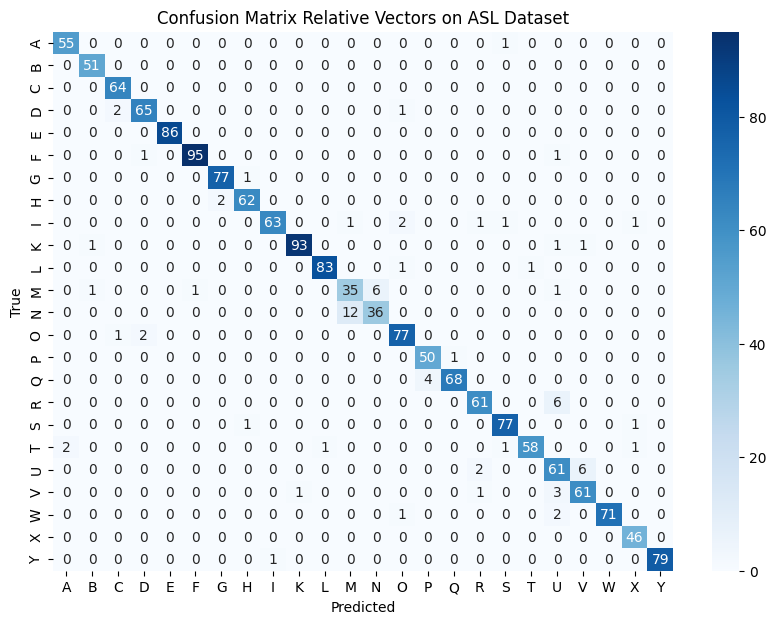

In [179]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_relative_asl, annot=True, fmt='d', cmap='Blues', xticklabels = alpha_dict_asl.values(), yticklabels = alpha_dict_asl.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Relative Vectors on ASL Dataset')
plt.savefig('Confusion_Matrix_Relative_Vectors_ASL.png')
plt.show()

<h1>KNN Algorithm using only the images containing the right hand from my Dataset</h1>

<h3>Observe the fact that the labels corresponding to the right hand letters are even number, so there is no need in recomputing anything.</h3>

<h2>KNN Alg. with Euclidean Distances (right hand only)</h2>

In [180]:
df_euclid_copy = df_euclid.copy()

In [181]:
df_euclid_copy.head()

Label         1         2         3         4         5         6  \
0     11  0.078186  0.156734  0.209405  0.237922  0.223260  0.310344   
1     11  0.071038  0.135689  0.179481  0.211314  0.174289  0.257440   
2     11  0.060105  0.120701  0.169371  0.205262  0.178105  0.249398   
3     11  0.074935  0.141860  0.188026  0.220388  0.175995  0.261918   
4     11  0.064073  0.126842  0.174161  0.208909  0.197546  0.270866   

          7         8         9  ...       201       202       203       204  \
0  0.294451  0.264745  0.232604  ...  0.245459  0.171683  0.128026  0.093421   
1  0.254032  0.241403  0.180689  ...  0.254096  0.180079  0.132797  0.097363   
2  0.244143  0.225072  0.190356  ...  0.207872  0.146004  0.106810  0.077318   
3  0.260656  0.246962  0.187625  ...  0.242714  0.169661  0.125415  0.093862   
4  0.256880  0.234637  0.207501  ...  0.224639  0.157661  0.117880  0.087991   

        205       206       207       208       209       210  
0  0.079873  0.128244  0.170347  0.048939  0.091458  0.042549  
1  0.080374  0.132814  0.175787  0.052870  0.096342  0.043574  
2  0.069548  0.113914  0.151408  0.044876  0.082820  0.037994  
3  0.081567  0.132525  0.172740  0.051430  0.092282  0.041017  
4  0.073710  0.119533  0.158517  0.046212  0.085539  0.039367  

[5 rows x 211 columns]

In [182]:
df_euclid_right = df_euclid_copy[df_euclid_copy['Label']%2 == 0]

In [183]:
df_euclid_right.head()

Label         1         2         3         4         5         6  \
300     40  0.057178  0.111435  0.149739  0.174371  0.164095  0.227665   
301     40  0.060508  0.122894  0.172813  0.206133  0.179015  0.259497   
302     40  0.041655  0.090561  0.127673  0.147492  0.121662  0.181576   
303     40  0.046541  0.083720  0.107486  0.128256  0.151938  0.219800   
304     40  0.037714  0.068354  0.093576  0.106942  0.101452  0.137406   

            7         8         9  ...       201       202       203  \
300  0.265091  0.295687  0.154353  ...  0.037881  0.037896  0.025665   
301  0.307420  0.347511  0.168389  ...  0.039414  0.037042  0.027076   
302  0.224357  0.257797  0.113451  ...  0.043097  0.033904  0.015347   
303  0.266202  0.302812  0.147072  ...  0.053181  0.034228  0.031043   
304  0.157326  0.171129  0.099229  ...  0.048035  0.028780  0.027623   

          204       205       206       207       208       209       210  
300  0.032698  0.022472  0.023875  0.035912  0.024526  0.045034  0.021156  
301  0.042606  0.032218  0.028679  0.038768  0.028956  0.053173  0.025308  
302  0.024948  0.029660  0.030758  0.034816  0.024605  0.042652  0.019776  
303  0.045437  0.038405  0.034096  0.036482  0.022945  0.046120  0.024067  
304  0.034961  0.022007  0.020628  0.014974  0.006562  0.015560  0.010125  

[5 rows x 211 columns]

In [184]:
df_euclid_right_without_label = df_euclid_right.copy()
df_euclid_right_without_label.drop(columns = ['Label'], axis=1, inplace=True)

In [185]:
df_euclid_right_without_label.head()

1         2         3         4         5         6         7  \
300  0.057178  0.111435  0.149739  0.174371  0.164095  0.227665  0.265091   
301  0.060508  0.122894  0.172813  0.206133  0.179015  0.259497  0.307420   
302  0.041655  0.090561  0.127673  0.147492  0.121662  0.181576  0.224357   
303  0.046541  0.083720  0.107486  0.128256  0.151938  0.219800  0.266202   
304  0.037714  0.068354  0.093576  0.106942  0.101452  0.137406  0.157326   

            8         9        10  ...       201       202       203  \
300  0.295687  0.154353  0.223248  ...  0.037881  0.037896  0.025665   
301  0.347511  0.168389  0.255815  ...  0.039414  0.037042  0.027076   
302  0.257797  0.113451  0.175798  ...  0.043097  0.033904  0.015347   
303  0.302812  0.147072  0.222878  ...  0.053181  0.034228  0.031043   
304  0.171129  0.099229  0.135057  ...  0.048035  0.028780  0.027623   

          204       205       206       207       208       209       210  
300  0.032698  0.022472  0.023875  0.035912  0.024526  0.045034  0.021156  
301  0.042606  0.032218  0.028679  0.038768  0.028956  0.053173  0.025308  
302  0.024948  0.029660  0.030758  0.034816  0.024605  0.042652  0.019776  
303  0.045437  0.038405  0.034096  0.036482  0.022945  0.046120  0.024067  
304  0.034961  0.022007  0.020628  0.014974  0.006562  0.015560  0.010125  

[5 rows x 210 columns]

In [186]:
X_euclid_right = df_euclid_right_without_label.copy()
y_euclid_right = df_euclid_right['Label']
X_train_euclid_right, X_test_euclid_right, y_train_euclid_right, y_test_euclid_right = train_test_split(X_euclid_right, 
                                                                                                        y_euclid_right, 
                                                                                                        test_size=0.3, 
                                                                                                        random_state=42)

In [187]:
print(f"X_train_euclid_right type: {type(X_train_euclid_right)}, shape: {X_train_euclid_right.shape}")
print(f"X_test_euclid_right type: {type(X_test_euclid_right)}, shape: {X_test_euclid_right.shape}")
print(f"y_train_euclid_right type: {type(y_train_euclid_right)}, shape: {y_train_euclid_right.shape}")
print(f"y_test_euclid type: {type(y_test_euclid_right)}, shape: {y_test_euclid_right.shape}")

X_train_euclid_right type: <class 'pandas.core.frame.DataFrame'>, shape: (3956, 210)
X_test_euclid_right type: <class 'pandas.core.frame.DataFrame'>, shape: (1696, 210)
y_train_euclid_right type: <class 'pandas.core.series.Series'>, shape: (3956,)
y_test_euclid type: <class 'pandas.core.series.Series'>, shape: (1696,)


In [188]:
scaler = StandardScaler() 
X_train_euclid_right = scaler.fit_transform(X_train_euclid_right)
X_test_euclid_right = scaler.transform(X_test_euclid_right)

In [189]:
X_train_euclid_right = torch.from_numpy(X_train_euclid_right)
X_test_euclid_right = torch.from_numpy(X_test_euclid_right)
y_train_euclid_right = torch.tensor(y_train_euclid_right.to_numpy())
y_test_euclid_right = torch.tensor(y_test_euclid_right.to_numpy()) 

In [190]:
print(type(X_train_euclid_right))
print(type(X_test_euclid_right))
print(type(y_train_euclid_right))
print(type(y_test_euclid_right))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [191]:
pred_test_euclid_right = train_knn(X_train_euclid_right, X_test_euclid_right, y_train_euclid_right, y_test_euclid_right, k_neighbors=1)
print(classification_report(y_test_euclid_right, pred_test_euclid_right))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98        86
           4       0.93      0.99      0.96        80
           6       0.99      1.00      1.00       102
           8       0.99      0.95      0.97        87
          10       0.86      0.98      0.92        96
          12       0.98      0.98      0.98        81
          14       0.96      0.92      0.94        48
          16       0.98      0.91      0.95        67
          18       1.00      0.94      0.97        52
          20       0.98      0.83      0.90        52
          22       0.96      0.93      0.94        82
          24       0.90      0.78      0.84        49
          26       0.91      0.91      0.91        85
          28       0.92      0.86      0.89        85
          30       0.83      0.91      0.87        65
          32       0.92      0.94      0.93        78
          34       0.89      0.91      0.90        46
          36       0.90    

In [192]:
from sklearn.metrics import confusion_matrix
conf_mat_euclid_right = confusion_matrix(y_test_euclid_right, pred_test_euclid_right)

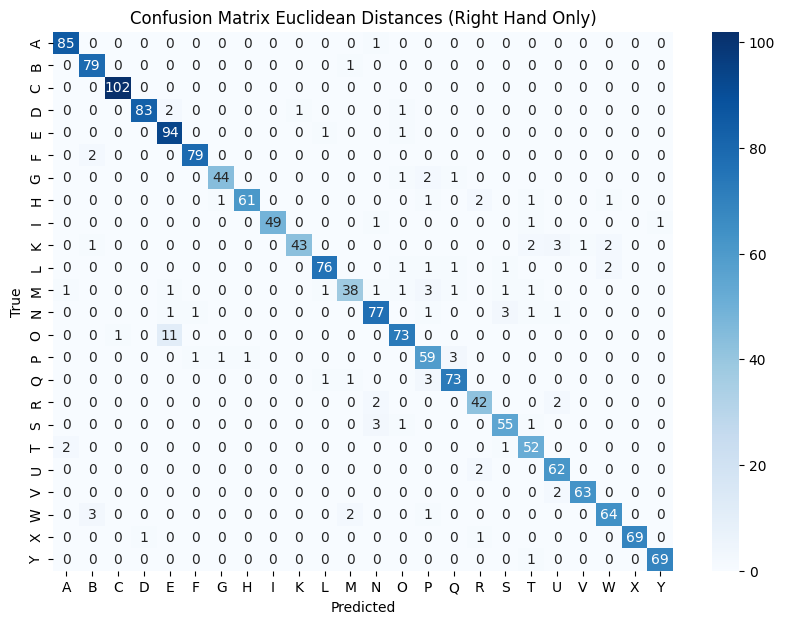

In [193]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat_euclid_right, annot=True, fmt='d', cmap='Blues', xticklabels = alpha_dict_asl.values(), yticklabels = alpha_dict_asl.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Euclidean Distances (Right Hand Only)')
plt.savefig('Confusion_Matrix_Euclidean_Distances_Right_Hand_Only.png')
plt.show()

<h2>KNN Alg. Euclidean Distances without Z-component (right hand only)</h2>

In [194]:
df_euclid_without_z_copy = df_euclid_without_z.copy()

In [195]:
df_euclid_without_z_right = df_euclid_without_z_copy[df_euclid_without_z_copy['Label'] % 2 == 0]

In [196]:
df_euclid_without_z_right.head()

Label         1         2         3         4         5         6  \
300     40  0.068691  0.141815  0.200732  0.219402  0.298484  0.427559   
301     40  0.051390  0.114396  0.163372  0.195433  0.177615  0.255144   
302     40  0.031608  0.062531  0.084236  0.098223  0.090672  0.125890   
303     40  0.043136  0.096486  0.136536  0.158939  0.132509  0.193246   
304     40  0.036939  0.079302  0.108151  0.128547  0.104669  0.151317   

            7         8         9  ...       201       202       203  \
300  0.508988  0.582780  0.287189  ...  0.135323  0.097078  0.045434   
301  0.301054  0.340490  0.166942  ...  0.029948  0.036924  0.027078   
302  0.148534  0.167408  0.084190  ...  0.020143  0.020837  0.014717   
303  0.235103  0.268527  0.122693  ...  0.041275  0.035362  0.018435   
304  0.183029  0.208794  0.096685  ...  0.027575  0.029368  0.019126   

          204       205       206       207       208       209       210  
300  0.036337  0.074542  0.092411  0.121324  0.055128  0.105096  0.050710  
301  0.040743  0.014329  0.014422  0.036496  0.028685  0.050815  0.022463  
302  0.018549  0.009165  0.006290  0.014211  0.012529  0.022282  0.009944  
303  0.027436  0.025125  0.023126  0.029321  0.025795  0.041812  0.017075  
304  0.023848  0.016706  0.008591  0.016752  0.018464  0.031254  0.013101  

[5 rows x 211 columns]

In [197]:
df_euclid_without_z_right_without_label = df_euclid_without_z_right.copy()
df_euclid_without_z_right_without_label.drop(columns = ['Label'], axis=1, inplace=True)

In [198]:
df_euclid_without_z_right_without_label.head()

1         2         3         4         5         6         7  \
300  0.068691  0.141815  0.200732  0.219402  0.298484  0.427559  0.508988   
301  0.051390  0.114396  0.163372  0.195433  0.177615  0.255144  0.301054   
302  0.031608  0.062531  0.084236  0.098223  0.090672  0.125890  0.148534   
303  0.043136  0.096486  0.136536  0.158939  0.132509  0.193246  0.235103   
304  0.036939  0.079302  0.108151  0.128547  0.104669  0.151317  0.183029   

            8         9        10  ...       201       202       203  \
300  0.582780  0.287189  0.441863  ...  0.135323  0.097078  0.045434   
301  0.340490  0.166942  0.250929  ...  0.029948  0.036924  0.027078   
302  0.167408  0.084190  0.123718  ...  0.020143  0.020837  0.014717   
303  0.268527  0.122693  0.190662  ...  0.041275  0.035362  0.018435   
304  0.208794  0.096685  0.149706  ...  0.027575  0.029368  0.019126   

          204       205       206       207       208       209       210  
300  0.036337  0.074542  0.092411  0.121324  0.055128  0.105096  0.050710  
301  0.040743  0.014329  0.014422  0.036496  0.028685  0.050815  0.022463  
302  0.018549  0.009165  0.006290  0.014211  0.012529  0.022282  0.009944  
303  0.027436  0.025125  0.023126  0.029321  0.025795  0.041812  0.017075  
304  0.023848  0.016706  0.008591  0.016752  0.018464  0.031254  0.013101  

[5 rows x 210 columns]

In [199]:
X_euclid_without_z_right = df_euclid_without_z_right_without_label.copy()
y_euclid_without_z_right = df_euclid_without_z_right['Label']
X_train_euclid_without_z_right, X_test_euclid_without_z_right, y_train_euclid_without_z_right, y_test_euclid_without_z_right = train_test_split(X_euclid_without_z_right, 
                                                                                                        y_euclid_without_z_right, 
                                                                                                        test_size=0.3, 
                                                                                                        random_state=42)

In [200]:
print(f"X_train_euclid_without_z_right type: {type(X_train_euclid_without_z_right)}, shape: {X_train_euclid_without_z_right.shape}")
print(f"X_test_euclid_without_z_right type: {type(X_test_euclid_without_z_right)}, shape: {X_test_euclid_without_z_right.shape}")
print(f"y_train_euclid_without_z_right type: {type(y_train_euclid_without_z_right)}, shape: {y_train_euclid_without_z_right.shape}")
print(f"y_test_euclid_without_z_right type: {type(y_test_euclid_without_z_right)}, shape: {y_test_euclid_without_z_right.shape}")

X_train_euclid_without_z_right type: <class 'pandas.core.frame.DataFrame'>, shape: (3956, 210)
X_test_euclid_without_z_right type: <class 'pandas.core.frame.DataFrame'>, shape: (1696, 210)
y_train_euclid_without_z_right type: <class 'pandas.core.series.Series'>, shape: (3956,)
y_test_euclid_without_z_right type: <class 'pandas.core.series.Series'>, shape: (1696,)


In [201]:
scaler = StandardScaler() 
X_train_euclid_without_z_right = scaler.fit_transform(X_train_euclid_without_z_right)
X_test_euclid_without_z_right = scaler.transform(X_test_euclid_without_z_right)

In [202]:
X_train_euclid_without_z_right = torch.from_numpy(X_train_euclid_without_z_right)
X_test_euclid_without_z_right = torch.from_numpy(X_test_euclid_without_z_right)
y_train_euclid_without_z_right = torch.tensor(y_train_euclid_without_z_right.to_numpy())
y_test_euclid_without_z_right = torch.tensor(y_test_euclid_without_z_right.to_numpy()) 

In [203]:
print(type(X_train_euclid_without_z_right))
print(type(X_test_euclid_without_z_right))
print(type(y_train_euclid_without_z_right))
print(type(y_test_euclid_without_z_right))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [204]:
pred_test_euclid_without_z_right = train_knn(X_train_euclid_without_z_right, X_test_euclid_without_z_right, y_train_euclid_without_z_right, y_test_euclid_without_z_right, k_neighbors=1)
print(classification_report(y_test_euclid_without_z_right, pred_test_euclid_without_z_right))

              precision    recall  f1-score   support

           2       0.99      0.97      0.98        86
           4       0.90      0.99      0.94        80
           6       1.00      0.99      1.00       102
           8       1.00      0.97      0.98        87
          10       0.88      0.95      0.91        96
          12       0.99      0.93      0.96        81
          14       0.91      0.88      0.89        48
          16       0.91      0.94      0.93        67
          18       1.00      0.98      0.99        52
          20       0.91      0.77      0.83        52
          22       0.95      0.90      0.92        82
          24       0.84      0.84      0.84        49
          26       0.94      0.91      0.92        85
          28       0.87      0.88      0.88        85
          30       0.90      0.86      0.88        65
          32       0.93      0.90      0.92        78
          34       0.87      0.89      0.88        46
          36       0.89    

In [205]:
from sklearn.metrics import confusion_matrix
conf_mat_euclid_without_z_right = confusion_matrix(y_test_euclid_without_z_right, pred_test_euclid_without_z_right)

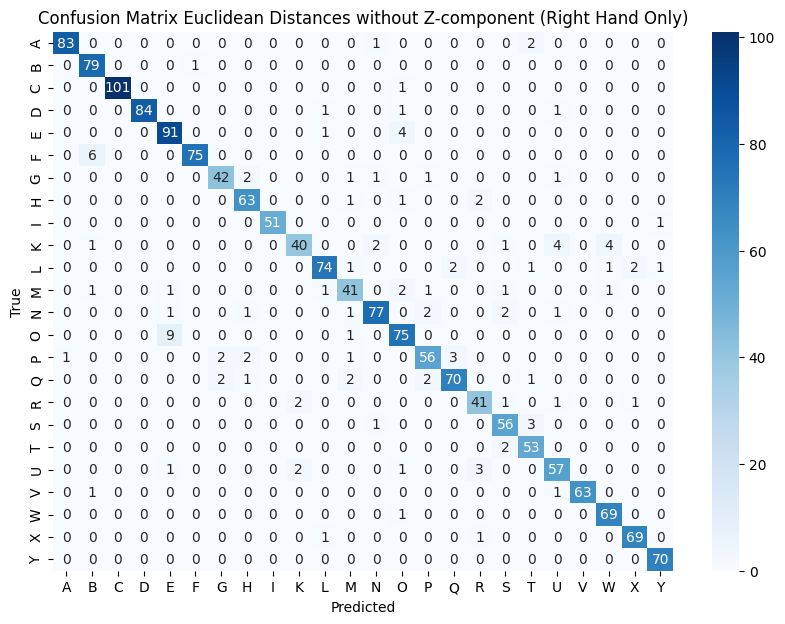

In [206]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat_euclid_without_z_right, annot=True, fmt='d', cmap='Blues', xticklabels = alpha_dict_asl.values(), yticklabels = alpha_dict_asl.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Euclidean Distances without Z-component (Right Hand Only)')
plt.savefig('Confusion_Matrix_Euclidean_Distances_without_Z_Right_Hand_Only.png')
plt.show()

<h2>KNN Alg. with Relative Vectors (right hand only)</h2>

In [207]:
df_relative_vectors_copy = df_relative_vectors.copy() 

In [208]:
df_relative_vectors_copy.head()

Label         1         2         3         4         5         6  \
0     11 -0.056369 -0.012312 -0.018270 -0.105397 -0.048555 -0.035591   
1     11 -0.039685 -0.017057 -0.007407 -0.071559 -0.051649 -0.015041   
2     11 -0.060620 -0.015061 -0.030594 -0.117240 -0.052926 -0.056245   
3     11 -0.045135 -0.012470 -0.017375 -0.083900 -0.049457 -0.031673   
4     11 -0.050254 -0.014036 -0.021246 -0.094719 -0.045305 -0.040045   

          7         8         9  ...        51        52        53        54  \
0 -0.141745 -0.077836 -0.055644  ... -0.045241  0.009415 -0.242811 -0.057231   
1 -0.095951 -0.074916 -0.025759  ... -0.029119  0.015226 -0.180185 -0.034947   
2 -0.155758 -0.084408 -0.083183  ... -0.052418  0.018270 -0.266836 -0.067858   
3 -0.109758 -0.076175 -0.047666  ... -0.042124  0.030351 -0.206915 -0.052494   
4 -0.123605 -0.070509 -0.060459  ... -0.045690  0.014503 -0.213543 -0.057531   

         55        56        57        58        59        60  
0 -0.004369 -0.286306 -0.059424 -0.018236 -0.323495 -0.058851  
1  0.007913 -0.210791 -0.034751  0.000468 -0.235676 -0.033492  
2  0.002803 -0.315530 -0.071052 -0.012783 -0.357318 -0.070790  
3  0.023558 -0.245386 -0.054297  0.016028 -0.277869 -0.053421  
4  0.004772 -0.251757 -0.058601 -0.004236 -0.284413 -0.057222  

[5 rows x 61 columns]

In [209]:
df_relative_vectors_right = df_relative_vectors_copy[df_relative_vectors_copy['Label'] % 2 == 0]

In [210]:
df_relative_vectors_right.head()

Label         1         2         3         4         5         6  \
300     40  0.035694 -0.051600 -0.038372  0.034940 -0.129132 -0.055860   
301     40  0.018302 -0.023507 -0.010926  0.022306 -0.055606 -0.016714   
302     40  0.021637 -0.034484 -0.019187  0.026736 -0.081093 -0.026600   
303     40  0.021399 -0.022833 -0.011236  0.026767 -0.052931 -0.017360   
304     40  0.030251 -0.040012 -0.036175  0.040599 -0.110717 -0.049058   

            7         8         9  ...        51        52        53  \
300 -0.006341 -0.172251 -0.071228  ... -0.050803 -0.093963 -0.175153   
301  0.017646 -0.080517 -0.023602  ... -0.029057 -0.029187 -0.080814   
302  0.011468 -0.118005 -0.033103  ... -0.016996 -0.026920 -0.097685   
303  0.020814 -0.077016 -0.024501  ... -0.028004 -0.024232 -0.085943   
304  0.011015 -0.165558 -0.059403  ... -0.032034 -0.052464 -0.121660   

           54        55        56        57        58        59        60  
300 -0.094435 -0.067085 -0.153002 -0.103161 -0.044896 -0.129076 -0.100561  
301 -0.044538 -0.015290 -0.077250 -0.043918 -0.003843 -0.069920 -0.039080  
302 -0.033198 -0.017067 -0.079314 -0.031052 -0.010880 -0.062634 -0.023385  
303 -0.042714 -0.011496 -0.081118 -0.042150 -0.001213 -0.071735 -0.037589  
304 -0.069326 -0.034726 -0.086706 -0.064364 -0.029750 -0.065834 -0.049893  

[5 rows x 61 columns]

In [211]:
df_relative_vectors_right_without_label = df_relative_vectors_right.copy()
df_relative_vectors_right_without_label.drop(columns = ['Label'], axis=1, inplace=True)

In [212]:
df_relative_vectors_right_without_label.head()

1         2         3         4         5         6         7  \
300  0.035694 -0.051600 -0.038372  0.034940 -0.129132 -0.055860 -0.006341   
301  0.018302 -0.023507 -0.010926  0.022306 -0.055606 -0.016714  0.017646   
302  0.021637 -0.034484 -0.019187  0.026736 -0.081093 -0.026600  0.011468   
303  0.021399 -0.022833 -0.011236  0.026767 -0.052931 -0.017360  0.020814   
304  0.030251 -0.040012 -0.036175  0.040599 -0.110717 -0.049058  0.011015   

            8         9        10  ...        51        52        53  \
300 -0.172251 -0.071228 -0.053080  ... -0.050803 -0.093963 -0.175153   
301 -0.080517 -0.023602  0.008582  ... -0.029057 -0.029187 -0.080814   
302 -0.118005 -0.033103 -0.011502  ... -0.016996 -0.026920 -0.097685   
303 -0.077016 -0.024501  0.011953  ... -0.028004 -0.024232 -0.085943   
304 -0.165558 -0.059403 -0.032401  ... -0.032034 -0.052464 -0.121660   

           54        55        56        57        58        59        60  
300 -0.094435 -0.067085 -0.153002 -0.103161 -0.044896 -0.129076 -0.100561  
301 -0.044538 -0.015290 -0.077250 -0.043918 -0.003843 -0.069920 -0.039080  
302 -0.033198 -0.017067 -0.079314 -0.031052 -0.010880 -0.062634 -0.023385  
303 -0.042714 -0.011496 -0.081118 -0.042150 -0.001213 -0.071735 -0.037589  
304 -0.069326 -0.034726 -0.086706 -0.064364 -0.029750 -0.065834 -0.049893  

[5 rows x 60 columns]

In [213]:
X_relative_vectors_right = df_relative_vectors_right_without_label.copy()
y_relative_vectors_right = df_relative_vectors_right['Label']
X_train_relative_vectors_right, X_test_relative_vectors_right, y_train_relative_vectors_right, y_test_relative_vectors_right = train_test_split(X_relative_vectors_right, 
                                                                                                                                                y_relative_vectors_right, 
                                                                                                                                                test_size=0.3, 
                                                                                                                                                random_state=42)

In [214]:
scaler = StandardScaler() 
X_train_relative_vectors_right = scaler.fit_transform(X_train_relative_vectors_right)
X_test_relative_vectors_right = scaler.transform(X_test_relative_vectors_right)

In [215]:
X_train_relative_vectors_right = torch.from_numpy(X_train_relative_vectors_right)
X_test_relative_vectors_right = torch.from_numpy(X_test_relative_vectors_right)
y_train_relative_vectors_right = torch.tensor(y_train_relative_vectors_right.to_numpy())
y_test_relative_vectors_right = torch.tensor(y_test_relative_vectors_right.to_numpy()) 

In [216]:
print(type(X_train_relative_vectors_right))
print(type(X_test_relative_vectors_right))
print(type(y_train_relative_vectors_right))
print(type(y_test_relative_vectors_right))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [217]:
pred_test_relative_vectors_right = train_knn(X_train_relative_vectors_right, 
                                             X_test_relative_vectors_right, 
                                             y_train_relative_vectors_right, 
                                             y_test_relative_vectors_right, 
                                             k_neighbors=1)
print(classification_report(y_test_relative_vectors_right, pred_test_relative_vectors_right))

              precision    recall  f1-score   support

           2       0.88      0.94      0.91        86
           4       0.89      0.99      0.93        80
           6       0.93      0.96      0.95       102
           8       0.91      0.98      0.94        87
          10       0.86      0.86      0.86        96
          12       0.96      0.90      0.93        81
          14       0.94      0.96      0.95        48
          16       0.97      0.97      0.97        67
          18       0.96      0.90      0.93        52
          20       0.90      0.87      0.88        52
          22       0.96      0.93      0.94        82
          24       0.84      0.78      0.81        49
          26       0.88      0.85      0.86        85
          28       0.84      0.80      0.82        85
          30       0.97      0.89      0.93        65
          32       0.89      0.94      0.91        78
          34       0.85      0.89      0.87        46
          36       0.87    

In [218]:
from sklearn.metrics import confusion_matrix
conf_mat_relative_vectors_right = confusion_matrix(y_test_relative_vectors_right, pred_test_relative_vectors_right)

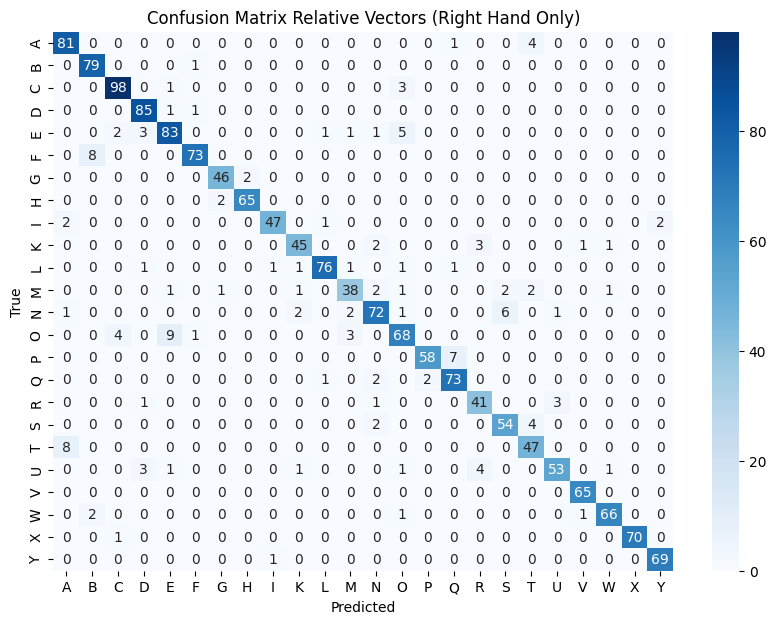

In [219]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat_relative_vectors_right, annot=True, fmt='d', cmap='Blues', xticklabels = alpha_dict_asl.values(), yticklabels = alpha_dict_asl.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Relative Vectors (Right Hand Only)')
plt.savefig('Confusion_Matrix_Relative_Vectors_Right_Hand_Only.png')
plt.show()

<h1>Distribution of Data in our Datasets</h1>

<h3>Loading the data frames</h3>

In [220]:
df_euclid_without_z = pd.read_csv('/HDD-1T/KNN/df_euclid_without_z.csv')
df_euclid = pd.read_csv('/HDD-1T/KNN/df_euclid.csv')
df_relative_vectors = pd.read_csv('/HDD-1T/KNN/df_relative_vectors.csv')

In [221]:
df_euclid_without_z.head()

Label         1         2         3         4         5         6  \
0     11  0.062569  0.119224  0.151987  0.171023  0.166752  0.237668   
1     11  0.064175  0.128800  0.178456  0.213729  0.194279  0.268996   
2     11  0.070757  0.136509  0.175181  0.195145  0.191910  0.258653   
3     11  0.074950  0.151705  0.199692  0.225621  0.217883  0.294709   
4     11  0.067447  0.131499  0.174571  0.201378  0.168004  0.238776   

          7         8         9  ...       201       202       203       204  \
0  0.216723  0.190002  0.171578  ...  0.248835  0.177323  0.130312  0.094309   
1  0.256834  0.230071  0.206725  ...  0.221006  0.155152  0.113134  0.081289   
2  0.237728  0.206543  0.198556  ...  0.203879  0.144800  0.108431  0.078946   
3  0.272905  0.238516  0.226131  ...  0.227908  0.158904  0.117940  0.086479   
4  0.232979  0.214670  0.172978  ...  0.225279  0.160170  0.118262  0.084202   

        205       206       207       208       209       210  
0  0.077872  0.130294  0.173695  0.052562  0.096119  0.043587  
1  0.074253  0.122172  0.162921  0.048248  0.089279  0.041061  
2  0.064209  0.104553  0.138781  0.040455  0.074858  0.034454  
3  0.074572  0.120202  0.158337  0.045717  0.083940  0.038235  
4  0.071219  0.118393  0.159962  0.047293  0.089029  0.041778  

[5 rows x 211 columns]

In [222]:
df_euclid.head()

Label         1         2         3         4         5         6  \
0     11  0.078186  0.156734  0.209405  0.237922  0.223260  0.310344   
1     11  0.071038  0.135689  0.179481  0.211314  0.174289  0.257440   
2     11  0.060105  0.120701  0.169371  0.205262  0.178105  0.249398   
3     11  0.074935  0.141860  0.188026  0.220388  0.175995  0.261918   
4     11  0.064073  0.126842  0.174161  0.208909  0.197546  0.270866   

          7         8         9  ...       201       202       203       204  \
0  0.294451  0.264745  0.232604  ...  0.245459  0.171683  0.128026  0.093421   
1  0.254032  0.241403  0.180689  ...  0.254096  0.180079  0.132797  0.097363   
2  0.244143  0.225072  0.190356  ...  0.207872  0.146004  0.106810  0.077318   
3  0.260656  0.246962  0.187625  ...  0.242714  0.169661  0.125415  0.093862   
4  0.256880  0.234637  0.207501  ...  0.224639  0.157661  0.117880  0.087991   

        205       206       207       208       209       210  
0  0.079873  0.128244  0.170347  0.048939  0.091458  0.042549  
1  0.080374  0.132814  0.175787  0.052870  0.096342  0.043574  
2  0.069548  0.113914  0.151408  0.044876  0.082820  0.037994  
3  0.081567  0.132525  0.172740  0.051430  0.092282  0.041017  
4  0.073710  0.119533  0.158517  0.046212  0.085539  0.039367  

[5 rows x 211 columns]

In [223]:
df_relative_vectors.head()

Label         1         2         3         4         5         6  \
0     11 -0.056369 -0.012312 -0.018270 -0.105397 -0.048555 -0.035591   
1     11 -0.039685 -0.017057 -0.007407 -0.071559 -0.051649 -0.015041   
2     11 -0.060620 -0.015061 -0.030594 -0.117240 -0.052926 -0.056245   
3     11 -0.045135 -0.012470 -0.017375 -0.083900 -0.049457 -0.031673   
4     11 -0.050254 -0.014036 -0.021246 -0.094719 -0.045305 -0.040045   

          7         8         9  ...        51        52        53        54  \
0 -0.141745 -0.077836 -0.055644  ... -0.045241  0.009415 -0.242811 -0.057231   
1 -0.095951 -0.074916 -0.025759  ... -0.029119  0.015226 -0.180185 -0.034947   
2 -0.155758 -0.084408 -0.083183  ... -0.052418  0.018270 -0.266836 -0.067858   
3 -0.109758 -0.076175 -0.047666  ... -0.042124  0.030351 -0.206915 -0.052494   
4 -0.123605 -0.070509 -0.060459  ... -0.045690  0.014503 -0.213543 -0.057531   

         55        56        57        58        59        60  
0 -0.004369 -0.286306 -0.059424 -0.018236 -0.323495 -0.058851  
1  0.007913 -0.210791 -0.034751  0.000468 -0.235676 -0.033492  
2  0.002803 -0.315530 -0.071052 -0.012783 -0.357318 -0.070790  
3  0.023558 -0.245386 -0.054297  0.016028 -0.277869 -0.053421  
4  0.004772 -0.251757 -0.058601 -0.004236 -0.284413 -0.057222  

[5 rows x 61 columns]

<h2>Distribution of Data in my Dataset</h2>

<p>It is more than sufficient to compute only the data distribution using only one Data Frame because each one of Euclid. Dist., Euclid. Dist. without Z-component, and Relative Vectors results are computed based on the extracted landmarks. Therefore, the data distribution of each Data Frame is the same</p>

array([[<Axes: title={'center': 'Label'}>]], dtype=object)

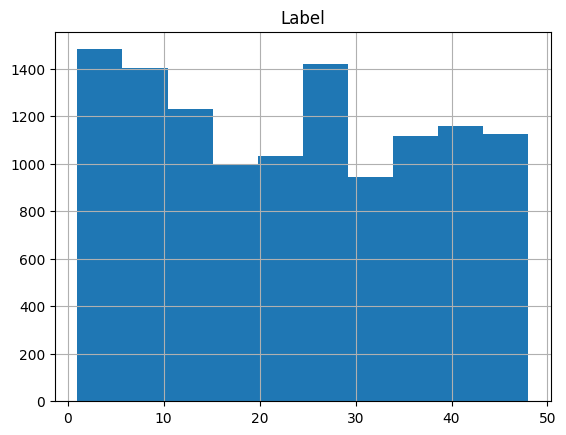

In [224]:
df_euclid_without_z.hist(column="Label")

In [225]:
label_counter = Counter(df_euclid_without_z['Label'])
print(label_counter)

Counter({11: 300, 1: 300, 29: 300, 5: 300, 8: 300, 9: 299, 6: 297, 17: 297, 27: 297, 25: 297, 4: 297, 3: 297, 12: 288, 2: 287, 23: 287, 13: 286, 10: 285, 19: 283, 26: 275, 43: 270, 37: 268, 45: 267, 35: 266, 33: 249, 42: 248, 28: 248, 22: 247, 31: 246, 39: 237, 44: 233, 30: 233, 46: 226, 48: 225, 7: 223, 41: 221, 32: 216, 24: 213, 16: 212, 18: 208, 38: 206, 36: 199, 14: 182, 40: 181, 34: 178, 47: 175, 15: 174, 20: 168, 21: 117})


In [226]:
label_counter_sorted = dict(sorted(label_counter.items()))
print(label_counter_sorted)

{1: 300, 2: 287, 3: 297, 4: 297, 5: 300, 6: 297, 7: 223, 8: 300, 9: 299, 10: 285, 11: 300, 12: 288, 13: 286, 14: 182, 15: 174, 16: 212, 17: 297, 18: 208, 19: 283, 20: 168, 21: 117, 22: 247, 23: 287, 24: 213, 25: 297, 26: 275, 27: 297, 28: 248, 29: 300, 30: 233, 31: 246, 32: 216, 33: 249, 34: 178, 35: 266, 36: 199, 37: 268, 38: 206, 39: 237, 40: 181, 41: 221, 42: 248, 43: 270, 44: 233, 45: 267, 46: 226, 47: 175, 48: 225}


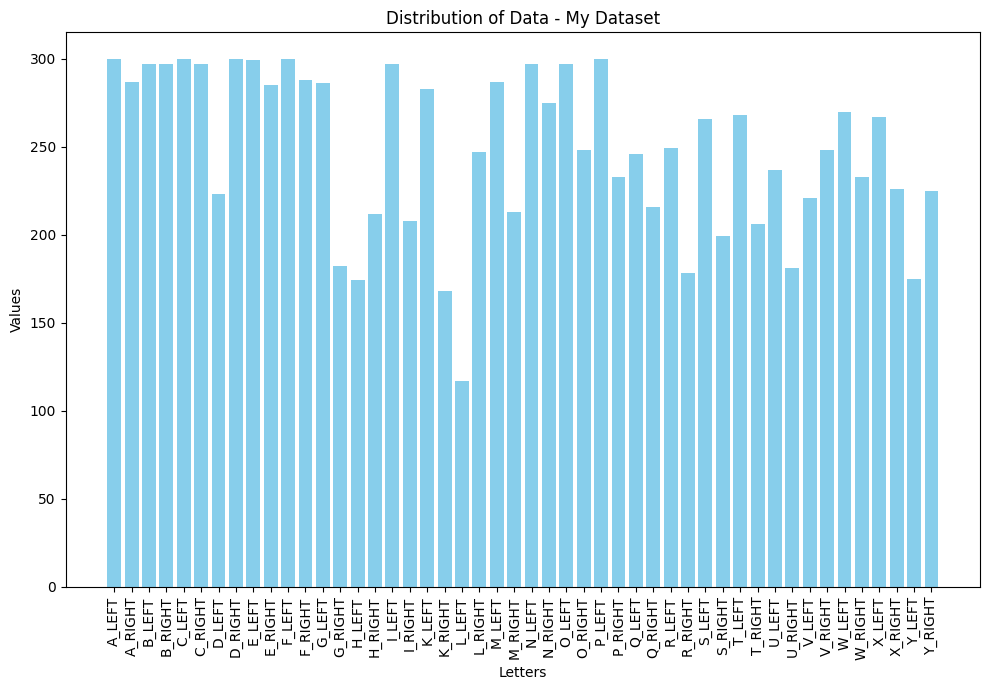

In [227]:
plt.figure(figsize=(10, 7))
values = list(label_counter_sorted.values())
plt.bar(alpha_dict.values(), values, color='skyblue')
plt.xlabel('Letters')
plt.ylabel('Values')
plt.title('Distribution of Data - My Dataset')
plt.xticks(list(alpha_dict.values()), rotation=90) 
plt.tight_layout()  
plt.savefig('Distribution of Data - My Dataset.png')
plt.show()

<h2>Distribution of Data in my Dataset Right Hand Only</h2>

In [228]:
df_euclid_without_z_copy = df_euclid_without_z.copy()

In [229]:
df_euclid_without_z_copy_right = df_euclid_without_z_copy[df_euclid_without_z_copy['Label'] % 2 == 0]

array([[<Axes: title={'center': 'Label'}>]], dtype=object)

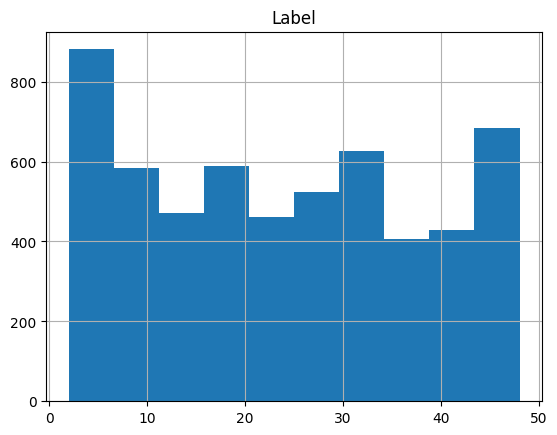

In [230]:
df_euclid_without_z_copy_right.hist(column="Label")

In [231]:
label_counter_right = Counter(df_euclid_without_z_copy_right['Label'])
print(label_counter_right)

Counter({8: 300, 6: 297, 4: 297, 12: 288, 2: 287, 10: 285, 26: 275, 42: 248, 28: 248, 22: 247, 44: 233, 30: 233, 46: 226, 48: 225, 32: 216, 24: 213, 16: 212, 18: 208, 38: 206, 36: 199, 14: 182, 40: 181, 34: 178, 20: 168})


In [232]:
label_counter_sorted_right = dict(sorted(label_counter_right.items()))
print(label_counter_sorted_right)

{2: 287, 4: 297, 6: 297, 8: 300, 10: 285, 12: 288, 14: 182, 16: 212, 18: 208, 20: 168, 22: 247, 24: 213, 26: 275, 28: 248, 30: 233, 32: 216, 34: 178, 36: 199, 38: 206, 40: 181, 42: 248, 44: 233, 46: 226, 48: 225}


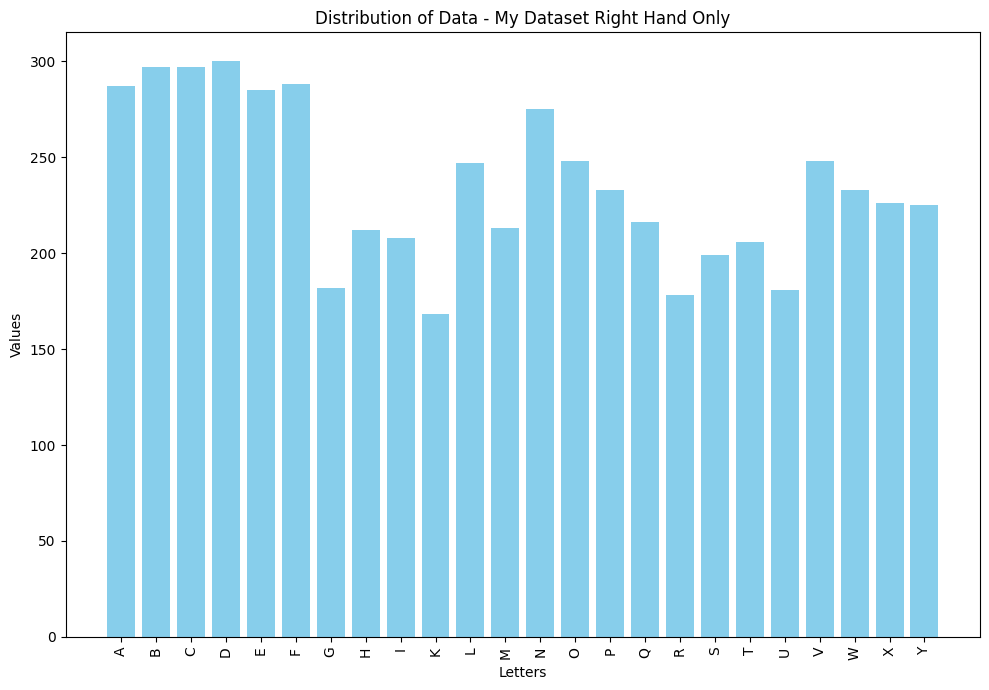

In [233]:
plt.figure(figsize=(10, 7))
values = list(label_counter_sorted_right.values())
plt.bar(alpha_dict_asl.values(), values, color='skyblue')
plt.xlabel('Letters')
plt.ylabel('Values')
plt.title('Distribution of Data - My Dataset Right Hand Only')
plt.xticks(list(alpha_dict_asl.values()), rotation=90) 
plt.tight_layout()  
plt.savefig('Distribution of Data - My Dataset Right Hand Only.png')
plt.show()

<h2>Distribution of Data in ASL Dataset</h2>

In [234]:
df_euclid_asl = pd.read_csv('/HDD-1T/KNN_asl_alphabet_train/df_euclid_asl.csv')

array([[<Axes: title={'center': 'Label'}>]], dtype=object)

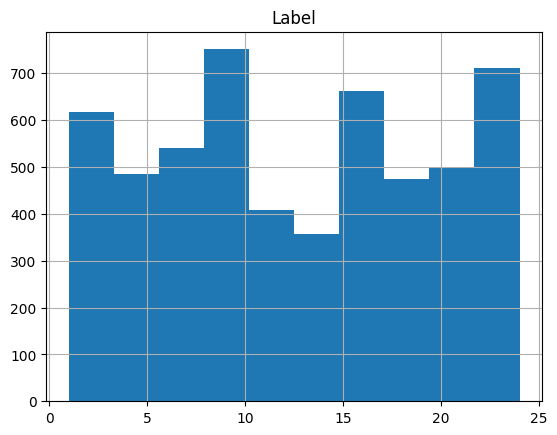

In [235]:
df_euclid_asl.hist(column="Label")

In [236]:
label_counter_asl = Counter(df_euclid_asl['Label'])
print(label_counter_asl)

Counter({6: 290, 10: 265, 24: 258, 4: 257, 20: 252, 17: 251, 7: 250, 18: 249, 21: 248, 22: 247, 9: 246, 11: 245, 8: 240, 5: 228, 14: 226, 19: 225, 1: 217, 16: 212, 23: 206, 2: 202, 15: 200, 3: 199, 12: 163, 13: 131})


In [237]:
label_counter_sorted_asl = dict(sorted(label_counter_asl.items()))
print(label_counter_sorted_asl)

{1: 217, 2: 202, 3: 199, 4: 257, 5: 228, 6: 290, 7: 250, 8: 240, 9: 246, 10: 265, 11: 245, 12: 163, 13: 131, 14: 226, 15: 200, 16: 212, 17: 251, 18: 249, 19: 225, 20: 252, 21: 248, 22: 247, 23: 206, 24: 258}


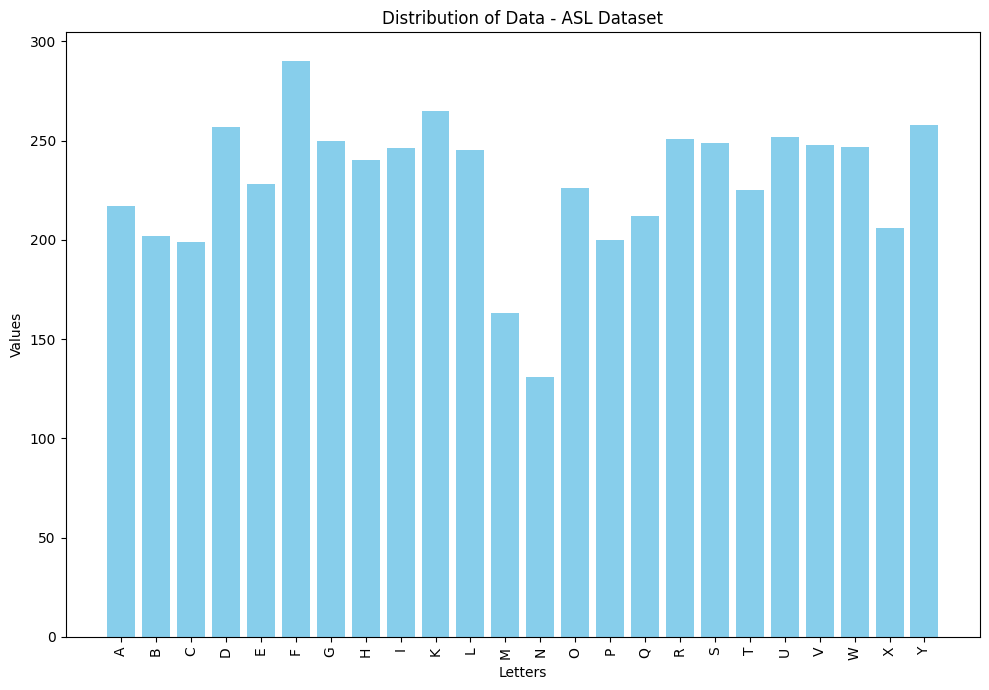

In [238]:
plt.figure(figsize=(10, 7))
values = list(label_counter_sorted_asl.values())
plt.bar(alpha_dict_asl.values(), values, color='skyblue')
plt.xlabel('Letters')
plt.ylabel('Values')
plt.title('Distribution of Data - ASL Dataset')
plt.xticks(list(alpha_dict_asl.values()), rotation=90) 
plt.tight_layout()  
plt.savefig('Distribution of Data - ASL Dataset.png')
plt.show()